<div class="alert alert-block alert-info">
<center> <h1> DATA MINING PROJECT </h1> </center> <br>
<center> CUSTOMER SEGMENTATION </center>

**GROUP :** <br>
- Gabriel Souza (m20210598@novaims.unl.pt) <br>
- Luiz Vizeu (m20210554@novaims.unl.pt) <br>

**Table of Contents** <br>
* [1.0 Import](#import)
* [2.0 Data Exploration](#exploration)
* [3.0 Data Visualization](#visualization)
* [4.0 Data Preparation](#preparation)
    * [4.1 Missing Values](#missing)
    * [4.2 Outliers](#outliers)
* [5.0 Data Pre-Processing](#processing)
    * [5.1 Featuring Engineering](#feature)      
    * [5.2 Scaling](#scaling)  
    * [5.3 Encoding (One-hot Encoder)](#encoding)
    * [5.4 Principal Components Analysis (PCA)](#pca)
* [6.0 Clustering](#clustering)
    * [6.1 Hierarquical Clustering](#hierarquical)
    * [6.2 K-Means Clustering](#k-means)
    * [6.3 Density Based - Mean Shift Clustering](#meanshift)
    * [6.4 Density Based - DBSCAN Clustering](#dbscan)
    * [6.5 SOM - Self Organizing Maps](#som)
    * [6.6 Merging Perspectives](#merge)
    * [6.7 Dimensionality Visualization T-SNE](#tsne)
    * [6.8 Outliers Classification](#outliers_classification)
* [7.0 Conclusion](#conclusion)

<hr>
<a class="anchor" id="import">
    
# 1.0 Import
    
</a>

In [1]:
#common packages
import pandas as pd
import numpy as np
import scipy as sp
from math import ceil, pi
import os
from itertools import product
import warnings
warnings.filterwarnings("ignore")

#dataviz
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline
sns.set()
import graphviz
import matplotlib.cm as cm

#algorithms for data preparation and preprocessing
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.neighbors import LocalOutlierFactor
from datetime import datetime
from scipy import stats

#clustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
from sklearn.manifold import TSNE
from sklearn.base import clone
from sklearn.neighbors import NearestNeighbors
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

<hr>
<a class="anchor" id="exploration">
    
# 2.0 Data Exploration
    
</a>

In [2]:
df = pd.read_sas('a2z_insurance.sas7bdat')

In [3]:
df.head(5)

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


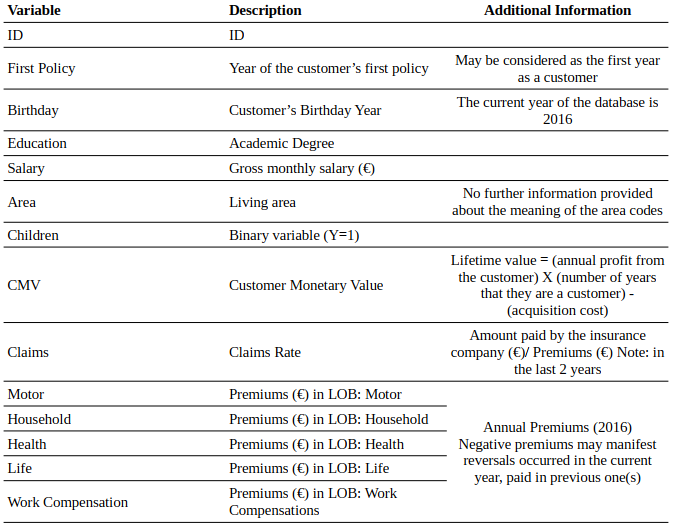

In [4]:
#describes the main statistics about the dataset for categorical features
df.describe(include = 'O')

,EducDeg
count,10279
unique,4
top,b'3 - BSc/MSc'
freq,4799


In [5]:
#describes the main statistics about the dataset for numerical features
df.describe()

,CustID,FirstPolYear,BirthYear,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
count,10296.00000,10266.000000,10279.000000,10260.000000,10295.000000,10275.000000,10296.000000,10296.000000,10262.000000,10296.000000,10253.000000,10192.000000,10210.000000
mean,5148.50000,1991.062634,1968.007783,2506.667057,2.709859,0.706764,177.892605,0.742772,300.470252,210.431192,171.580833,41.855782,41.277514
std,2972.34352,511.267913,19.709476,1157.449634,1.266291,0.455268,1945.811505,2.916964,211.914997,352.595984,296.405976,47.480632,51.513572
min,1.00000,1974.000000,1028.000000,333.000000,1.000000,0.000000,-165680.420000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000
25%,2574.75000,1980.000000,1953.000000,1706.000000,1.000000,0.000000,-9.440000,0.390000,190.590000,49.450000,111.800000,9.890000,10.670000
50%,5148.50000,1986.000000,1968.000000,2501.500000,3.000000,1.000000,186.870000,0.720000,298.610000,132.800000,162.810000,25.560000,25.670000
75%,7722.25000,1992.000000,1983.000000,3290.250000,4.000000,1.000000,399.777500,0.980000,408.300000,290.050000,219.820000,57.790000,56.790000
max,10296.00000,53784.000000,2001.000000,55215.000000,4.000000,1.000000,11875.890000,256.200000,11604.420000,25048.800000,28272.000000,398.300000,1988.700000


In [6]:
#show the general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10296 non-null  float64
 1   FirstPolYear   10266 non-null  float64
 2   BirthYear      10279 non-null  float64
 3   EducDeg        10279 non-null  object 
 4   MonthSal       10260 non-null  float64
 5   GeoLivArea     10295 non-null  float64
 6   Children       10275 non-null  float64
 7   CustMonVal     10296 non-null  float64
 8   ClaimsRate     10296 non-null  float64
 9   PremMotor      10262 non-null  float64
 10  PremHousehold  10296 non-null  float64
 11  PremHealth     10253 non-null  float64
 12  PremLife       10192 non-null  float64
 13  PremWork       10210 non-null  float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [7]:
#shows the number os null observations
df.isna().sum()

CustID             0
FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [8]:
# shows duplicated observations if exists
df.duplicated().sum()

0

In [9]:
df.dtypes

CustID           float64
FirstPolYear     float64
BirthYear        float64
EducDeg           object
MonthSal         float64
GeoLivArea       float64
Children         float64
CustMonVal       float64
ClaimsRate       float64
PremMotor        float64
PremHousehold    float64
PremHealth       float64
PremLife         float64
PremWork         float64
dtype: object

<hr>
<a class="anchor" id="visualization">
    
# 3.0 Data Visualization
    
</a>

In [10]:
df.columns

Index(['CustID', 'FirstPolYear', 'BirthYear', 'EducDeg', 'MonthSal',
       'GeoLivArea', 'Children', 'CustMonVal', 'ClaimsRate', 'PremMotor',
       'PremHousehold', 'PremHealth', 'PremLife', 'PremWork'],
      dtype='object')

In [11]:
#Defining metric and non-metric features. 
non_metric_list = ["CustID","EducDeg", "GeoLivArea", "Children"]
metric_features = df.columns.drop(non_metric_list).to_list()
non_metric_features = ["EducDeg", "GeoLivArea", "Children"]

#### Numerical Variables Visualization

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='

findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFiveSymReg.ttf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-da

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\constan.ttf', name='Constantia', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\consola.ttf', name='Consolas', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\trebuc.ttf', name='Trebuchet MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\timesbi.ttf', name='Times New Roman', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoepr.ttf', name='Segoe Print', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbeli.ttf', name='Corbel', style='italic', variant='normal'

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Candarali.ttf', name='Candara', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\gadugi.ttf', name='Gadugi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Candarai.ttf', name='Candara', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\sylfaen.ttf', name='Sylfaen', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Nirmala.ttf', name='Nirmala UI', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\ProgramData\\Kingsoft\\office6\\mtfont\\mtextra.ttf', name='MT Extra', style='normal', variant

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ariali.ttf', name='Arial', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\courbi.ttf', name='Courier New', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\NirmalaB.ttf', name='Nirmala UI', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguibli.ttf', name='Segoe UI', style='italic', variant='normal', weight=900, stretch='normal', size='scalable')) = 11.525
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\YuGothR.ttc', name='Yu Gothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\gadugib.ttf', name='Gadugi', style='normal', variant='normal', weight=70

findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 2.05
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 3.335
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIX

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\cambriab.ttf', name='Cambria', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\pala.ttf', name='Palatino Linotype', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbel.ttf', name='Corbel', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\constanz.ttf', name='Constantia', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\YuGothB.ttc', name='Yu Gothic', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\bahnschrift.ttf', name='Bahnschrift', style='normal', variant='norm

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\times.ttf', name='Times New Roman', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Sitka.ttc', name='Sitka Small', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\marlett.ttf', name='Marlett', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\msyhl.ttc', name='Microsoft YaHei', style='normal', variant='normal', weight=290, stretch='normal', size='scalable')) = 10.1545
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\malgun.ttf', name='Malgun Gothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguili.ttf', name='Segoe UI', style='italic', variant='norm

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\arialbi.ttf', name='Arial', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\malgunsl.ttf', name='Malgun Gothic', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbell.ttf', name='Corbel', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ntailub.ttf', name='Microsoft New Tai Lue', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\couri.ttf', name='Courier New', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\taileb.ttf', name='Microsoft Tai Le', style='normal', varia

findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniBol.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmr10.ttf', name='cmr10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\tt

findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniBolIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbeli.ttf', name='Corbel', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\courbd.ttf', name='Courier New', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbelli.ttf', name='Corbel', style='italic', variant='normal', weight=300, stretch='normal', size='scalable')) = 11.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\simsun.ttc', name='SimSun', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoeuiz.ttf', name='Segoe UI', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\mmrtext.ttf', name='Myanmar Text', style='normal', variant='normal', weight=4

findfont: score(FontEntry(fname='C:\\ProgramData\\Kingsoft\\office6\\mtfont\\mtextra.ttf', name='MT Extra', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\georgiab.ttf', name='Georgia', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\constani.ttf', name='Constantia', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\georgiai.ttf', name='Georgia', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoeuisl.ttf', name='Segoe UI', style='normal', variant='normal', weight=350, stretch='normal', size='scalable')) = 10.0975
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguibl.ttf', name='Segoe UI', style='normal'

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\gadugib.ttf', name='Gadugi', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\framdit.ttf', name='Franklin Gothic Medium', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\mingliub.ttc', name='MingLiU-ExtB', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\comic.ttf', name='Comic Sans MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\trebucbd.ttf', name='Trebuchet MS', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbelz.ttf', name='Corbel', style='italic', varia

findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 2.05
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 3.335
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fo

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbel.ttf', name='Corbel', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\constanz.ttf', name='Constantia', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\YuGothB.ttc', name='Yu Gothic', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\bahnschrift.ttf', name='Bahnschrift', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\msyh.ttc', name='Microsoft YaHei', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\webdings.ttf', name='Webdings', style='normal', variant='normal

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\marlett.ttf', name='Marlett', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\msyhl.ttc', name='Microsoft YaHei', style='normal', variant='normal', weight=290, stretch='normal', size='scalable')) = 10.1545
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\malgun.ttf', name='Malgun Gothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguili.ttf', name='Segoe UI', style='italic', variant='normal', weight=300, stretch='normal', size='scalable')) = 11.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\calibrib.ttf', name='Calibri', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\timesi.ttf', name='Times New Roman', style='italic', variant='no

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbell.ttf', name='Corbel', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ntailub.ttf', name='Microsoft New Tai Lue', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\couri.ttf', name='Courier New', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\taileb.ttf', name='Microsoft Tai Le', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SitkaI.ttc', name='Sitka Small', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\consolai.ttf', name='Consolas', style='italic', varia

title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting


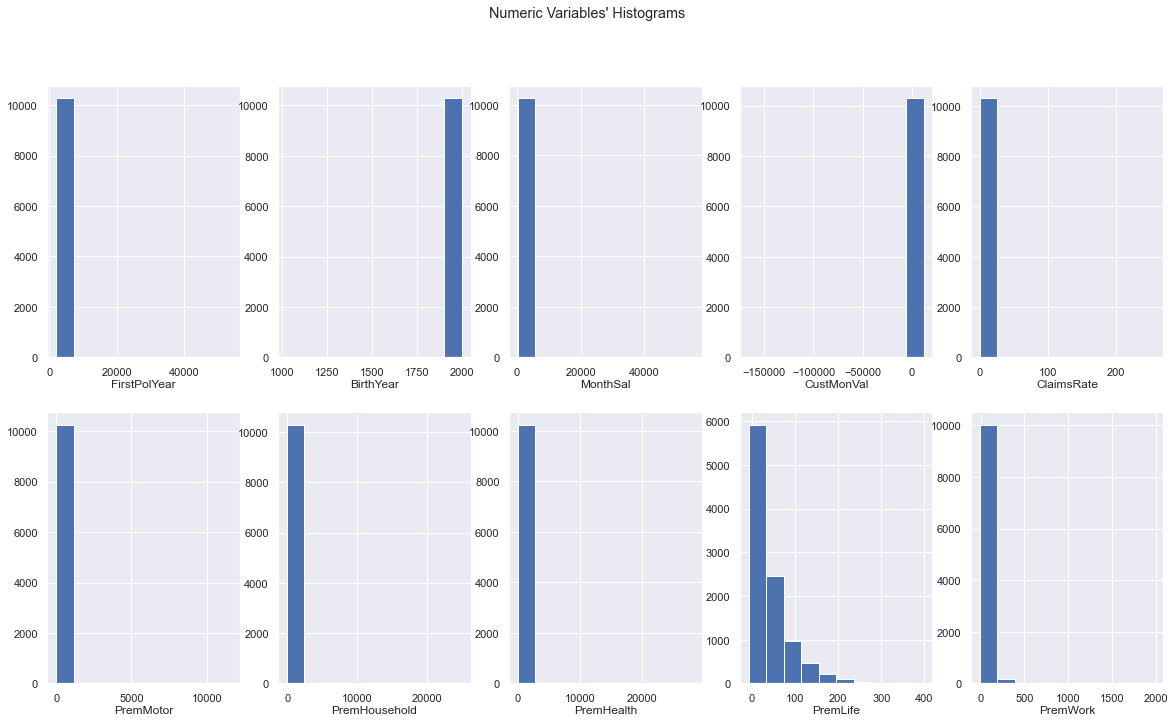

In [12]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(df[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()


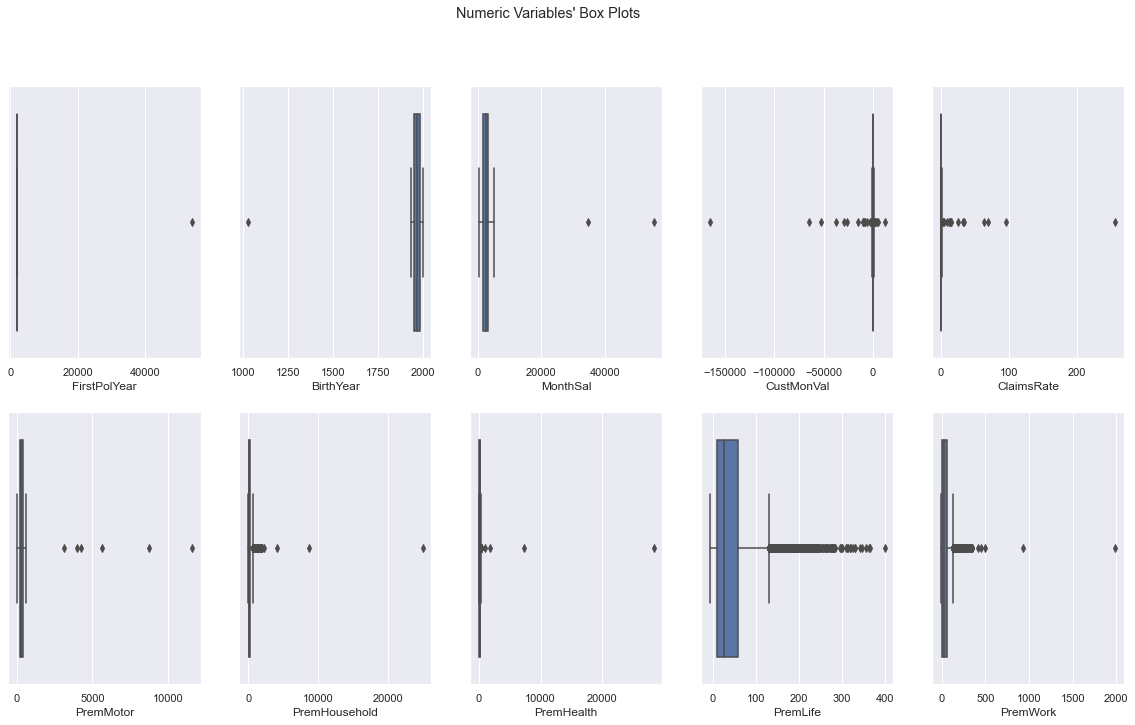

In [13]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()


#### exploring the metric features with a combined scatterplot

In [14]:
# # Pairwise Relationship of Numerical Variables
# sns.set()

# # Setting pairplot
# sns.pairplot(df[metric_features], diag_kind="hist")

# # Layout
# plt.subplots_adjust(top=0.95)
# plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=25)

# plt.show()


#### analyzing the correlation matrix for the numerical variables

locator: <matplotlib.ticker.AutoLocator object at 0x000001A78082B8E0>
top of Axes not in the figure, so title not moved
top of Axes not in the figure, so title not moved
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=20.0.
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\t

findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmex10.ttf', name='cmex10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFiveSymReg.ttf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-B

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\tahoma.ttf', name='Tahoma', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\taile.ttf', name='Microsoft Tai Le', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\constan.ttf', name='Constantia', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\consola.ttf', name='Consolas', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\trebuc.ttf', name='Trebuchet MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\timesbi.ttf', name='Times New Roman', style='italic', variant='normal

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\impact.ttf', name='Impact', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoeuii.ttf', name='Segoe UI', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Candarali.ttf', name='Candara', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\gadugi.ttf', name='Gadugi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Candarai.ttf', name='Candara', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\sylfaen.ttf', name='Sylfaen', style='normal', variant='normal', weight=400, stret

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\comicbd.ttf', name='Comic Sans MS', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\framd.ttf', name='Franklin Gothic Medium', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ariali.ttf', name='Arial', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\courbi.ttf', name='Courier New', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\NirmalaB.ttf', name='Nirmala UI', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguibli.ttf', name='Segoe UI', style='italic', variant='

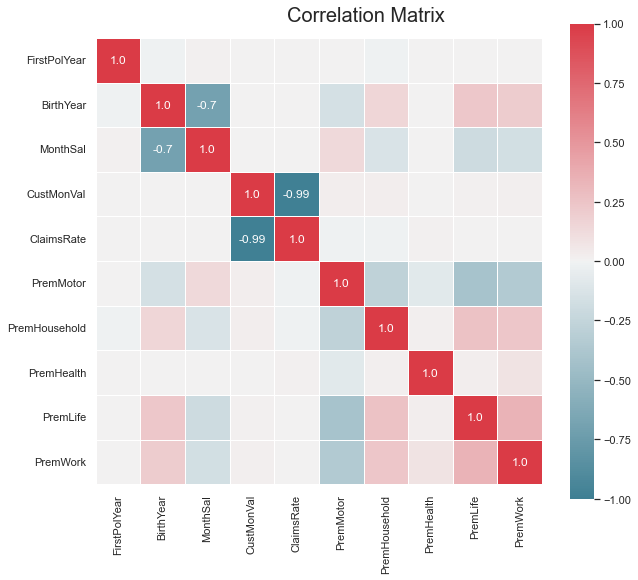

In [15]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df[metric_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

#### Categorical Variables Visualization

In [16]:
df[non_metric_features].columns

Index(['EducDeg', 'GeoLivArea', 'Children'], dtype='object')

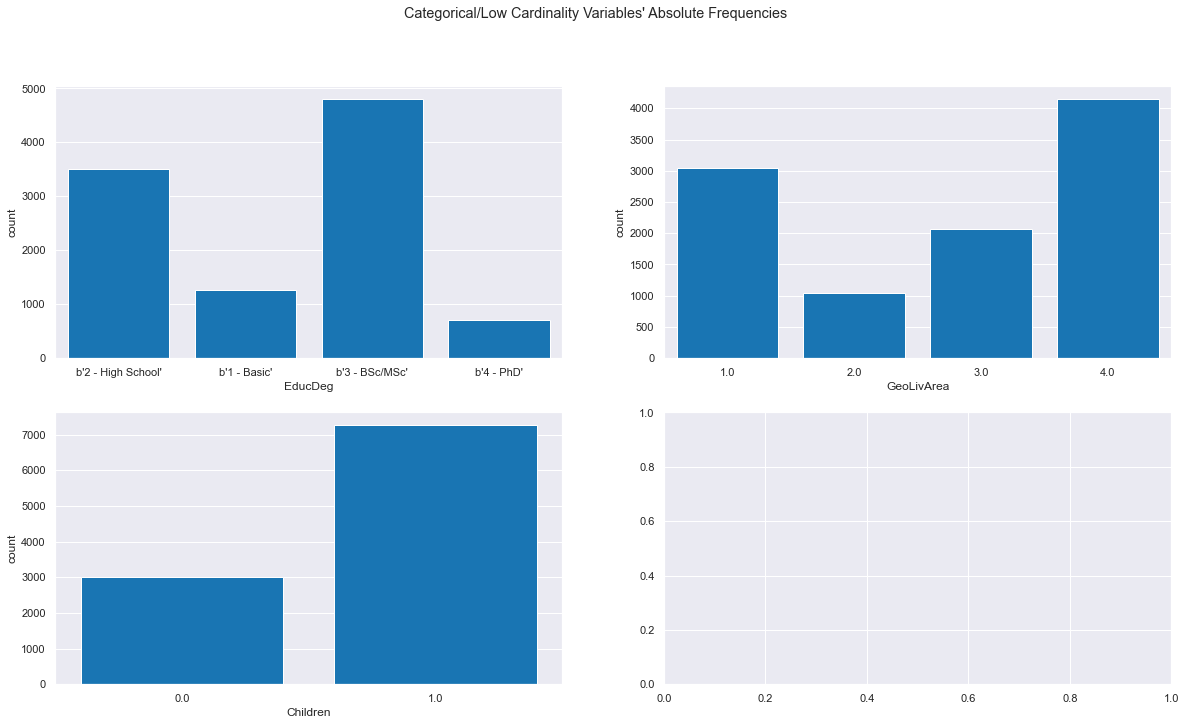

In [17]:
# All Non-Metric Variables' Absolute Frequencies
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    sns.countplot(df[feat].astype(object), ax=ax, color='#007acc')

title = "Categorical/Low Cardinality Variables' Absolute Frequencies"
plt.suptitle(title)

plt.show()


#### comparing categorical variables 

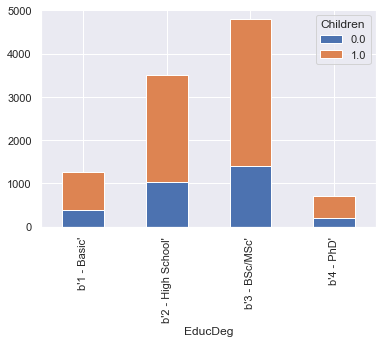

In [18]:
# Comparing Education Level and the presence of children
sns.set()
df_counts = df\
    .groupby(['EducDeg', 'Children'])\
    .size()\
    .unstack()\
    .plot.bar(stacked=True)

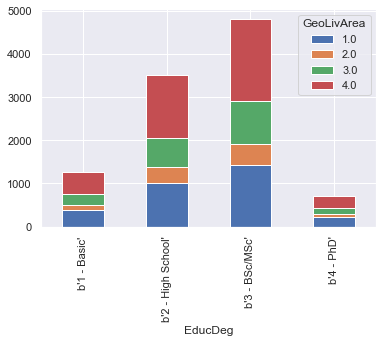

In [19]:
# Comparing Education Level and geo localization
sns.set()
df_counts = df\
    .groupby(['EducDeg', 'GeoLivArea'])\
    .size()\
    .unstack()\
    .plot.bar(stacked=True)

<hr>
<a class="anchor" id="preparation">
    
# 4.0 Data Preparation
    
</a>

#### In data preparation we will explore the following steps:

- fill the missing values using KNN Imputer technique
- make adjustments in datatype for some variables
- eliminate the outliers by using techniques such as manual threshold filtering and IQR filtering

<hr>
<a class="anchor" id="preparation">
    
## 4.1 Missing Values
    
</a>

#### Applying some methods to adjust the datatype while filling the missing values with KNN Imputer

In [20]:
#checking the data types before casting
df.dtypes

CustID           float64
FirstPolYear     float64
BirthYear        float64
EducDeg           object
MonthSal         float64
GeoLivArea       float64
Children         float64
CustMonVal       float64
ClaimsRate       float64
PremMotor        float64
PremHousehold    float64
PremHealth       float64
PremLife         float64
PremWork         float64
dtype: object

In [21]:
#use vectorised str.decode to decode byte strings into ordinary strings
df['EducDeg'] = df['EducDeg'].str.decode(encoding = "utf-8", errors="strict")

In [22]:
#checking the unique values for the EducDeg variable
df['EducDeg'].unique()

array(['2 - High School', '1 - Basic', '3 - BSc/MSc', '4 - PhD', nan],
      dtype=object)

In [23]:
#defining function to create a new column to store the label of the education degree
def label_education (row):
   if row['EducDeg'] ==  '1 - Basic':
      return 1
   if row['EducDeg'] ==  '2 - High School':
      return 2
   if row['EducDeg'] ==  '3 - BSc/MSc':
      return 3
   if row['EducDeg'] ==  '4 - PhD':
      return 4

In [24]:
#applying the function and creating a new column to store the results
df['LabelEducDeg'] = df.apply(lambda row: label_education(row), axis=1)

In [25]:
#checking the missing values for the new column 'LabelEducDeg' to match the former column 'EducDeg'
df.isna().sum()

CustID             0
FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
LabelEducDeg      17
dtype: int64

In [26]:
#checking the unique values for the GeoLivArea variable
df['LabelEducDeg'].unique()

array([ 2.,  1.,  3.,  4., nan])

In [27]:
#checking the unique values for the GeoLivArea variable
df['GeoLivArea'].unique()

array([ 1.,  4.,  3.,  2., nan])

In [28]:
#checking the unique values for the Children variable
df['Children'].unique()

array([ 1.,  0., nan])

In [29]:
#shows the number os null observations (before applying KNN imputer)
df.isna().sum()

CustID             0
FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
LabelEducDeg      17
dtype: int64

### KNN Imputer - filling missing values from neighbohrs approximation

In [30]:
#Re-defining metric and non-metric features
non_metric_list = ["CustID","EducDeg", "GeoLivArea", "Children"]
metric_features = df.columns.drop(non_metric_list).to_list()
non_metric_features = ["EducDeg", "GeoLivArea", "Children"]

In [31]:
# Creating a object to store the index of null observation

nans_index = df.isna().any(axis=1)

# Seeing rows with NaNs
df[nans_index]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,LabelEducDeg
21,22.0,1977.0,1958.0,2 - High School,NaN,3.0,1.0,111.37,0.80,407.52,111.70,100.13,24.67,30.34,2.0
68,69.0,1983.0,1977.0,2 - High School,1399.0,4.0,1.0,476.65,0.33,330.73,186.70,211.15,NaN,15.78,2.0
138,139.0,1979.0,1976.0,2 - High School,2538.0,2.0,1.0,149.59,0.69,194.26,305.60,NaN,37.34,17.67,2.0
143,144.0,1996.0,1990.0,3 - BSc/MSc,NaN,4.0,1.0,-42.45,1.02,146.36,353.95,220.04,121.80,42.01,3.0
184,185.0,1993.0,1984.0,2 - High School,2419.0,4.0,1.0,-62.23,1.07,NaN,253.95,230.60,5.89,43.12,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,10011.0,NaN,1947.0,2 - High School,3959.0,2.0,NaN,-128.24,1.14,177.81,153.35,311.28,67.79,35.45,2.0
10057,10058.0,1983.0,1980.0,2 - High School,1569.0,4.0,1.0,222.60,0.55,235.60,211.15,NaN,32.34,68.79,2.0
10142,10143.0,1986.0,1985.0,3 - BSc/MSc,1652.0,3.0,1.0,55.67,0.88,257.05,94.45,308.39,NaN,13.78,3.0
10284,10285.0,1980.0,1987.0,3 - BSc/MSc,1504.0,4.0,1.0,-1.55,0.96,390.63,29.45,179.70,-6.00,NaN,3.0


In [32]:
# KNNImputer - only  for numerical variables

#create an instance of the KNN imputer
imputer = KNNImputer(n_neighbors=5, weights="uniform", metric='nan_euclidean')

#fits and transforms the metric_features with the KNN Imputer
df[metric_features] = imputer.fit_transform(df[metric_features])

#categorical variables with numerical formats : + ['Children', 'GeoLivArea']

In [33]:
# See rows with NaNs imputed
df.loc[nans_index, metric_features]

,FirstPolYear,BirthYear,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,LabelEducDeg
21,1977.0,1958.0,2541.2,111.37,0.80,407.520,111.70,100.130,24.670,30.340,2.0
68,1983.0,1977.0,1399.0,476.65,0.33,330.730,186.70,211.150,33.784,15.780,2.0
138,1979.0,1976.0,2538.0,149.59,0.69,194.260,305.60,226.598,37.340,17.670,2.0
143,1996.0,1990.0,1721.8,-42.45,1.02,146.360,353.95,220.040,121.800,42.010,3.0
184,1993.0,1984.0,2419.0,-62.23,1.07,264.428,253.95,230.600,5.890,43.120,2.0
...,...,...,...,...,...,...,...,...,...,...,...
10010,1990.8,1947.0,3959.0,-128.24,1.14,177.810,153.35,311.280,67.790,35.450,2.0
10057,1983.0,1980.0,1569.0,222.60,0.55,235.600,211.15,247.602,32.340,68.790,2.0
10142,1986.0,1985.0,1652.0,55.67,0.88,257.050,94.45,308.390,23.338,13.780,3.0
10284,1980.0,1987.0,1504.0,-1.55,0.96,390.630,29.45,179.700,-6.000,15.736,3.0


In [34]:
#shows the number os null observations (after applying KNN imputer)
df.isna().sum()

CustID            0
FirstPolYear      0
BirthYear         0
EducDeg          17
MonthSal          0
GeoLivArea        1
Children         21
CustMonVal        0
ClaimsRate        0
PremMotor         0
PremHousehold     0
PremHealth        0
PremLife          0
PremWork          0
LabelEducDeg      0
dtype: int64

In [35]:
#replacing missing values with each variable mode (categorical variables)

#EducDeg
df['EducDeg'] = df['EducDeg'].fillna(df['EducDeg'].mode()[0])

#GeoLivArea
df['GeoLivArea'] = df['GeoLivArea'].fillna(df['GeoLivArea'].mode()[0])

#Children
df['Children'] = df['Children'].fillna(df['Children'].mode()[0])

In [36]:
#shows the number os null observations (after applying All Missing Values Methods)
df.isna().sum()

CustID           0
FirstPolYear     0
BirthYear        0
EducDeg          0
MonthSal         0
GeoLivArea       0
Children         0
CustMonVal       0
ClaimsRate       0
PremMotor        0
PremHousehold    0
PremHealth       0
PremLife         0
PremWork         0
LabelEducDeg     0
dtype: int64

#### Get the correct data type to the variables

In [37]:
#casting the variables to the right data type

df.astype({
            'CustID': 'int64',
            'FirstPolYear': 'int64',
            'BirthYear': 'int64',
            'LabelEducDeg': 'int64',
            'EducDeg': 'object',
            'GeoLivArea': 'object',
            'Children': 'object'
          }).dtypes

CustID             int64
FirstPolYear       int64
BirthYear          int64
EducDeg           object
MonthSal         float64
GeoLivArea        object
Children          object
CustMonVal       float64
ClaimsRate       float64
PremMotor        float64
PremHousehold    float64
PremHealth       float64
PremLife         float64
PremWork         float64
LabelEducDeg       int64
dtype: object

In [38]:
df.head()

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,LabelEducDeg
0,1.0,1985.0,1982.0,2 - High School,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,2.0
1,2.0,1981.0,1995.0,2 - High School,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,2.0
2,3.0,1991.0,1970.0,1 - Basic,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,1.0
3,4.0,1990.0,1981.0,3 - BSc/MSc,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,3.0
4,5.0,1986.0,1973.0,3 - BSc/MSc,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,3.0


<hr>
<a class="anchor" id="outliers">
    
## 4.2 Outliers
    
</a>

In [39]:
# check descriptive statistics again
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustID,10296.0,NaN,NaN,NaN,5148.5,2972.34352,1.0,2574.75,5148.5,7722.25,10296.0
FirstPolYear,10296.0,NaN,NaN,NaN,1991.047999,510.522542,1974.0,1980.0,1986.0,1992.0,53784.0
BirthYear,10296.0,NaN,NaN,NaN,1968.007517,19.700801,1028.0,1953.0,1968.0,1983.0,2001.0
EducDeg,10296,4,3 - BSc/MSc,4816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthSal,10296.0,NaN,NaN,NaN,2506.48378,1156.118108,333.0,1706.75,2500.5,3290.0,55215.0
GeoLivArea,10296.0,NaN,NaN,NaN,2.709984,1.266293,1.0,1.0,3.0,4.0,4.0
Children,10296.0,NaN,NaN,NaN,0.707362,0.454996,0.0,0.0,1.0,1.0,1.0
CustMonVal,10296.0,NaN,NaN,NaN,177.892605,1945.811505,-165680.42,-9.44,186.87,399.7775,11875.89
ClaimsRate,10296.0,NaN,NaN,NaN,0.742772,2.916964,0.0,0.39,0.72,0.98,256.2
PremMotor,10296.0,NaN,NaN,NaN,300.671206,211.65539,-4.11,191.26,299.28,408.3,11604.42


### Filtering by IQR method

In [40]:
#creating a copy of the dataset to test IQR outlier removal method
df_iqr = df.copy()

In [41]:
# Applying the technique IQR for outlier removal

q25 = df.quantile(.25)
q75 = df.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 2.5 * iqr
lower_lim = q25 - 2.5 * iqr

filters = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters.append(df_iqr[metric].between(llim, ulim, inclusive=True))

df_iqr_2 = df_iqr[np.all(filters, 0)]
print('Percentage of data kept after removing outliers:', np.round(df_iqr_2.shape[0] / df_iqr.shape[0], 4))

Percentage of data kept after removing outliers: 0.9312


#### checking the box plot for the 97% of the data that were kept after IQR method (2.5 x iqr)

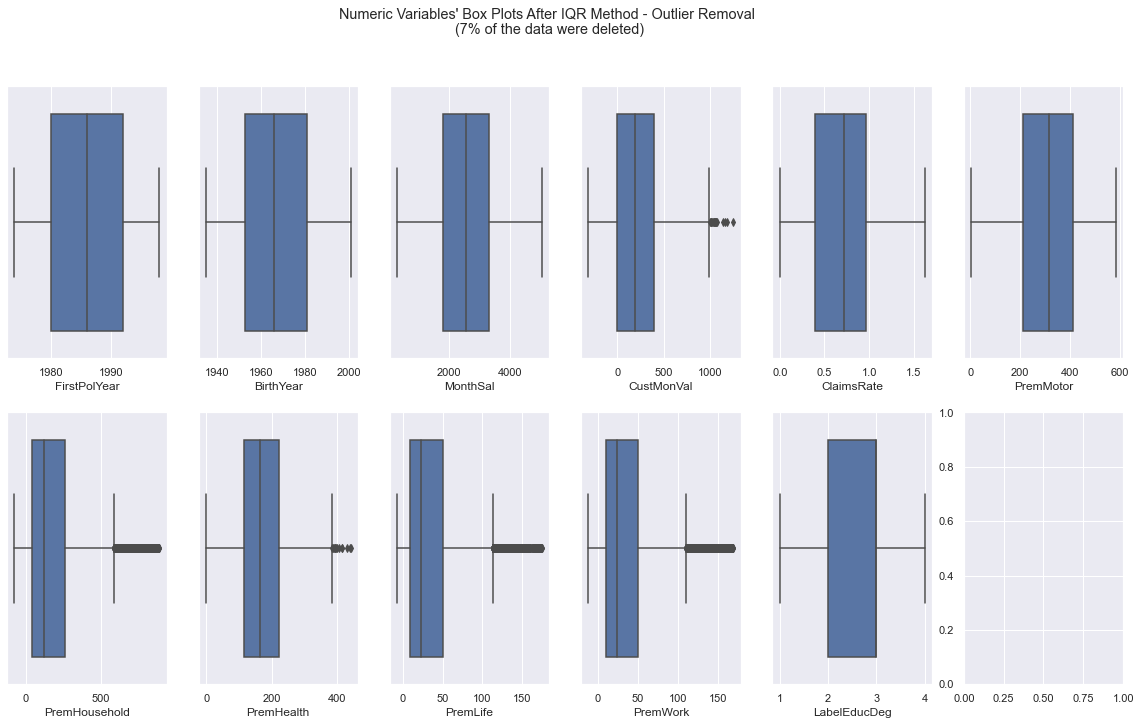

In [42]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df_iqr_2[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots After IQR Method - Outlier Removal\n (7% of the data were deleted)"

plt.suptitle(title)

plt.show()


### Filtering by LOF method (Local Outlier Factor)

In [43]:
#creating a copy of the dataset to test LOF outlier removal method
df_lof = df.copy()

In [44]:
#Creating an instance of LOF with 20 neighbors
lof = LocalOutlierFactor(n_neighbors=20)

#creating an index prediction for the outliers
lof_pred = lof.fit_predict(df_lof[metric_features])

#storing the indexes of the outliers in an object
outlier_index = df_lof[lof_pred == -1] # negative values are outliers

#storing the regular observations  (not outliers) in a different object
df_lof_regular = df_lof[lof_pred != -1] # positive values are regular observations


print('Percentage of data kept after removing outliers:', np.round(df_lof_regular.shape[0] / df_lof.shape[0], 4))

Percentage of data kept after removing outliers: 0.9903


#### checking the box plot for the 99% of the data that were kept after LOF method (20 neighbors)

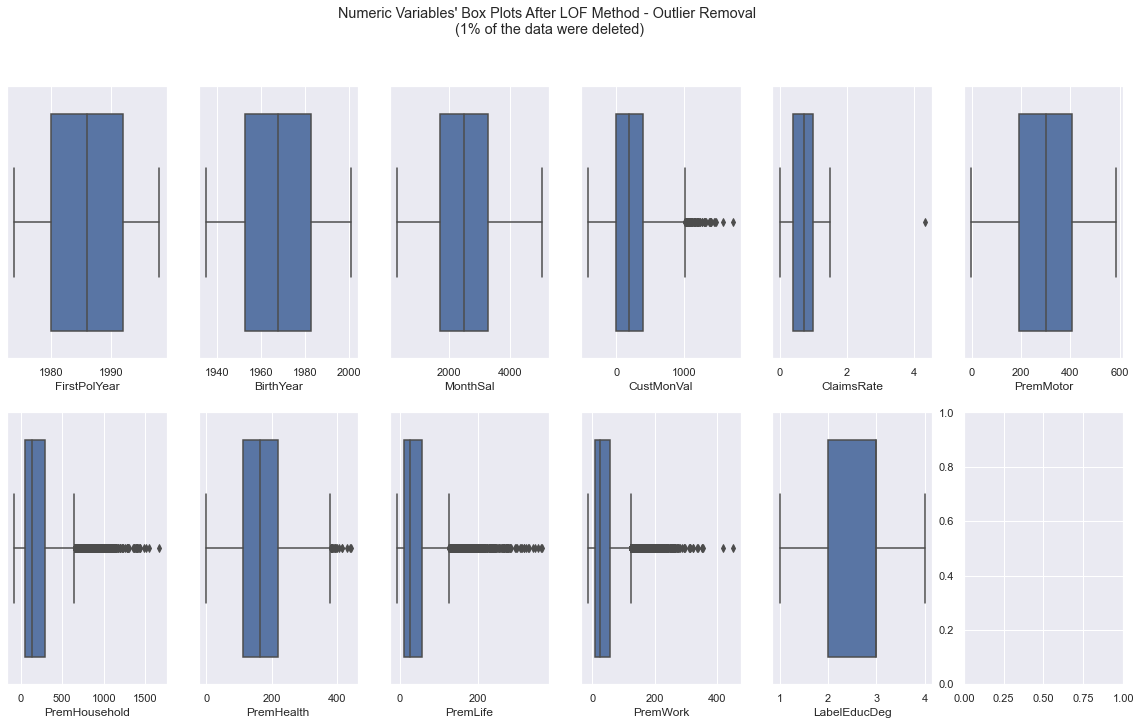

In [45]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df_lof_regular[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots After LOF Method - Outlier Removal\n (1% of the data were deleted)"

plt.suptitle(title)

plt.show()


### Filtering by Z-Score method

In [46]:
#creating a copy of the dataset to test Z-Score outlier removal method
df_z = df.copy()

In [47]:
#creating an instance of the z-score for the metric features
z = np.abs(stats.zscore(df_z[metric_features]))

# Discard the observation that are 5 standard deviations above the mean
df_z2 = df_z[(z < 5).all(axis=1)]

print('Percentage of data kept after removing outliers:', np.round(df_z2.shape[0] / df_z.shape[0], 4))

Percentage of data kept after removing outliers: 0.9935


#### checking the box plot for the 96% of the data that were kept after Z-Score method (5 std)

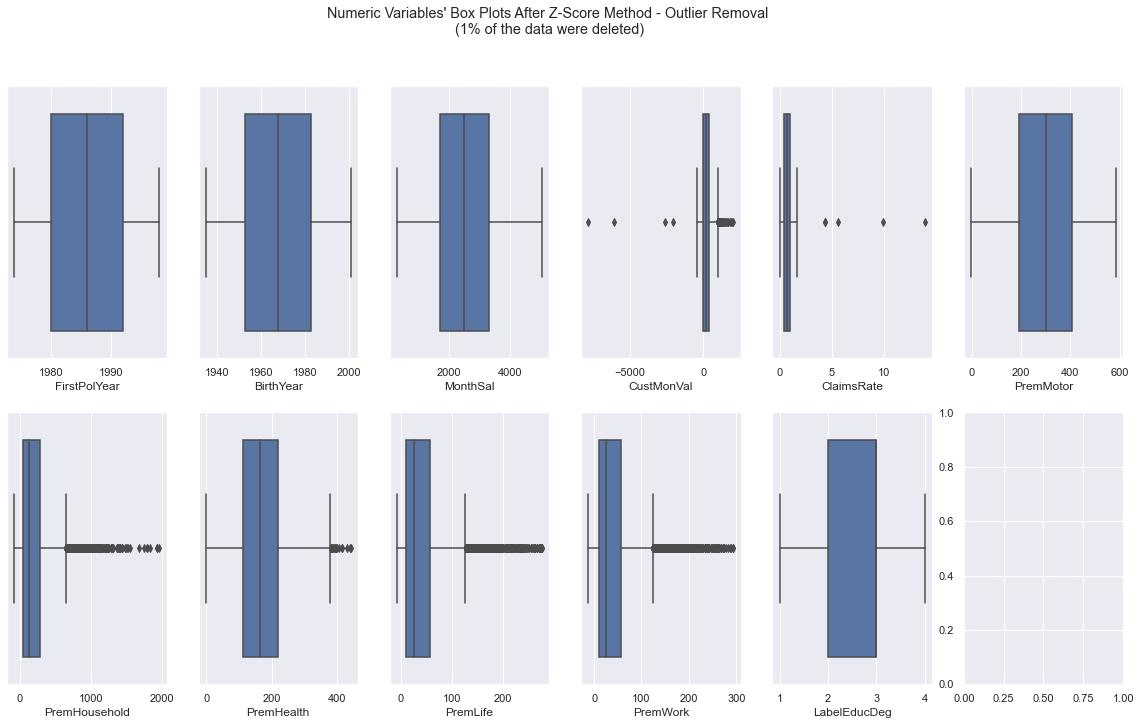

In [48]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df_z2[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots After Z-Score Method - Outlier Removal\n (1% of the data were deleted)"

plt.suptitle(title)

plt.show()


#### Merging the results obtained from LOF and Z-Score

In [49]:
#merging the dataframes obtained from LOF and Z-Score Outlier removal methods
df_merge = df_lof_regular.merge(df_z2)

#creating a new dataframe only with the outliers which will be analyzed separately later
#defines the new dataframe and identifies the observations which is outlier
df_outliers = df.merge(df_merge,indicator = True, how='left').loc[lambda x : x['_merge']!='both']

#drops the column "_merge" and preserves all observations of the new outlier dataframe
df_outliers.drop(columns={"_merge"},inplace=True)

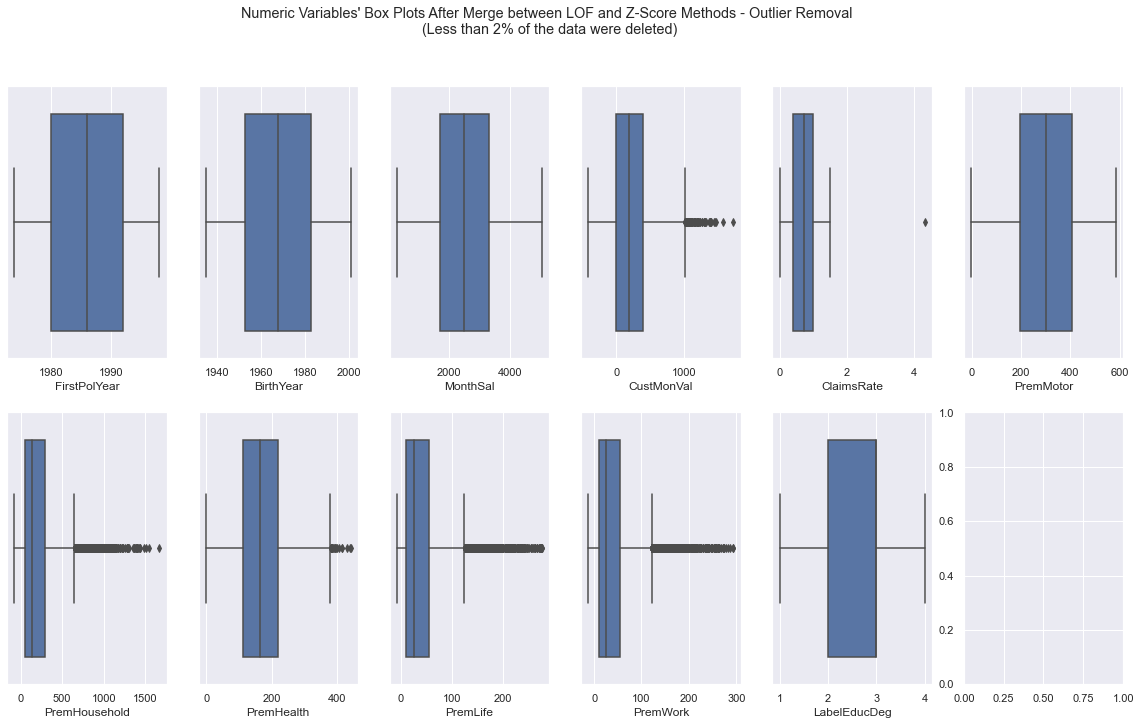

Percentage of data kept after removing outliers: 0.9868


In [50]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df_merge[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots After Merge between LOF and Z-Score Methods - Outlier Removal\n (Less than 2% of the data were deleted)"

plt.suptitle(title)

plt.show()

print('Percentage of data kept after removing outliers:', np.round(df_merge.shape[0] / df.shape[0], 4))

#### Assigning the results to the original df object

In [51]:
#assigning the cleaned dataframe to the original object 'df'
df_final = df_merge.copy()

In [52]:
# check descriptive statistics again
df_final.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustID,10160.0,NaN,NaN,NaN,5153.754232,2969.385834,1.0,2585.75,5154.5,7723.25,10296.0
FirstPolYear,10160.0,NaN,NaN,NaN,1986.018425,6.595044,1974.0,1980.0,1986.0,1992.0,1998.0
BirthYear,10160.0,NaN,NaN,NaN,1968.003681,17.326059,1935.0,1953.0,1968.0,1983.0,2001.0
EducDeg,10160,4,3 - BSc/MSc,4788,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthSal,10160.0,NaN,NaN,NaN,2503.165295,980.858863,333.0,1716.0,2504.0,3291.25,5021.0
GeoLivArea,10160.0,NaN,NaN,NaN,2.710827,1.265767,1.0,1.0,3.0,4.0,4.0
Children,10160.0,NaN,NaN,NaN,0.708268,0.454582,0.0,0.0,1.0,1.0,1.0
CustMonVal,10160.0,NaN,NaN,NaN,217.893475,254.158843,-406.07,-8.44,187.37,398.575,1716.0
ClaimsRate,10160.0,NaN,NaN,NaN,0.679365,0.319025,0.0,0.39,0.72,0.98,4.33
PremMotor,10160.0,NaN,NaN,NaN,299.004103,137.118453,-4.11,194.26,301.335,408.52,585.22


<hr>
<a class="anchor" id="processing">
    
# 5.0 Data Pre-Processing
    
</a>

#### At this point we are going to perform the following steps:
- Featuring Engineering
- Scaling
- Encoding Variables (One-hot Encoder)
- Dimensionality Reduction (Principal Components Analysys - PCA)

<hr>
<a class="anchor" id="feature">
    
## 5.1 Feature Engineering
    
</a>

#### Creating features Age and Tenure and setting the right data types

In [53]:
#creating the variable Age from the Birthday Year variable (Year of the dataset is 2016)
df_final['Age'] = 2016 - df_final['BirthYear']

#Creating the variable Tenure which means the amount of years the customer is a client
df_final['Tenure'] = 2016 - df_final['FirstPolYear']

#casting the variables to the right data type

df_final.astype({
            'Age': 'int64',
            'Tenure': 'int64'
          }).dtypes

CustID           float64
FirstPolYear     float64
BirthYear        float64
EducDeg           object
MonthSal         float64
GeoLivArea       float64
Children         float64
CustMonVal       float64
ClaimsRate       float64
PremMotor        float64
PremHousehold    float64
PremHealth       float64
PremLife         float64
PremWork         float64
LabelEducDeg     float64
Age                int64
Tenure             int64
dtype: object

<hr>
<a class="anchor" id="scaling">
    
## 5.2 Scaling
    
</a>

In [54]:
#Re-defining metric and non-metric features
non_metric_list = ["CustID","EducDeg", "GeoLivArea", "Children", "LabelEducDeg"]
metric_features = df_final.columns.drop(non_metric_list).to_list()
non_metric_features = ["EducDeg", "GeoLivArea", "Children", "LabelEducDeg"]

In [55]:
#Using MinMaxScaler to scale the data - feature_range between -1 and 1
scaler = StandardScaler()##MinMaxScaler(feature_range=(-1,1))

#fits the Scaler in the metric_features
scaled_feat = scaler.fit_transform(df_final[metric_features])

#replacing the metric features after the scalling
df_final[metric_features] = scaled_feat

df_final.head()

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,LabelEducDeg,Age,Tenure
0,1.0,-0.154430,0.807859,2 - High School,-0.332547,1.0,1.0,0.641664,-0.907073,0.560462,-0.546326,-0.298094,0.141350,-0.517825,2.0,-0.807859,0.154430
1,2.0,-0.760976,1.558211,2 - High School,-1.861894,4.0,1.0,-1.373317,1.381258,-1.615793,0.920581,-0.698539,3.414266,1.491846,2.0,-1.558211,0.760976
2,3.0,0.755388,0.115226,1 - Basic,-0.230590,3.0,0.0,1.128391,-1.251890,-0.677215,0.085522,-0.592051,1.014453,1.331730,1.0,-0.115226,-0.755388
3,4.0,0.603752,0.750139,3 - BSc/MSc,-1.431638,4.0,1.0,-0.924206,0.973747,-0.849848,-0.703580,1.926286,-0.117651,-0.259973,3.0,-0.750139,-0.603752
4,5.0,-0.002794,0.288384,3 - BSc/MSc,-0.754647,4.0,1.0,-0.718733,0.691624,0.288932,-0.684195,0.190889,-0.485180,0.035262,3.0,-0.288384,0.002794


<hr>
<a class="anchor" id="encoding">
    
## 5.3 Encoding (One-hot Encoder)
    
</a>

In [56]:
#creating a copy of the original dataset to use the Encoder
df_ohc = df_final.copy()

In [57]:
#Using the OneHotEncoder to encode the categorical features
ohc = OneHotEncoder(sparse=False, drop="first")

#fits the OHC into the categorical features
ohc_feat = ohc.fit_transform(df_ohc[['GeoLivArea','Children','EducDeg']])

#Get feature names and create a DataFrame 
ohc_feat_names = ohc.get_feature_names()

# with the one-hot encoded categorical features (pass feature names)
df_ohc_categoricals = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names) 

df_ohc_categoricals

,x0_2.0,x0_3.0,x0_4.0,x1_1.0,x2_2 - High School,x2_3 - BSc/MSc,x2_4 - PhD
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
10155,0.0,1.0,0.0,1.0,0.0,0.0,0.0
10156,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10157,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10158,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [58]:
# Reassigning df to contain ohc variables
df_ohc = pd.concat([df_ohc.drop(columns = non_metric_features),df_ohc_categoricals], axis = 1)

#convert the df_ohc to df
df_final = df_ohc.copy()

#set CustID as index
# df_final.set_index('CustID', inplace = True)

#show the first 5 rows to see the data after all transformations
df_final.head()

,CustID,FirstPolYear,BirthYear,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Age,Tenure,x0_2.0,x0_3.0,x0_4.0,x1_1.0,x2_2 - High School,x2_3 - BSc/MSc,x2_4 - PhD
0,1.0,-0.154430,0.807859,-0.332547,0.641664,-0.907073,0.560462,-0.546326,-0.298094,0.141350,-0.517825,-0.807859,0.154430,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,2.0,-0.760976,1.558211,-1.861894,-1.373317,1.381258,-1.615793,0.920581,-0.698539,3.414266,1.491846,-1.558211,0.760976,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,3.0,0.755388,0.115226,-0.230590,1.128391,-1.251890,-0.677215,0.085522,-0.592051,1.014453,1.331730,-0.115226,-0.755388,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.603752,0.750139,-1.431638,-0.924206,0.973747,-0.849848,-0.703580,1.926286,-0.117651,-0.259973,-0.750139,-0.603752,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,5.0,-0.002794,0.288384,-0.754647,-0.718733,0.691624,0.288932,-0.684195,0.190889,-0.485180,0.035262,-0.288384,0.002794,0.0,0.0,1.0,1.0,0.0,1.0,0.0


<hr>
<a class="anchor" id="pca">
    
## 5.4 Principal Components Analysis (PCA)
    
</a>

In [59]:
#creating a copy of the dataset to apply PCA
df_pca = df_final.copy()

In [60]:
#creating an instance of PCA to reduce data dimensionality 
pca = PCA()

#fits and tranforms the data by applying the PCA algorithm from scikit-learn
pca_feat = pca.fit_transform(df_pca[metric_features])

In [61]:
# creating an output table for PCA: the idea is to check how much variance is explained by each component
pca_table = pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

pca_table

,Eigenvalue,Difference,Proportion,Cumulative
1,3.690940e+00,0.000000e+00,3.075481e-01,0.307548
2,2.156568e+00,-1.534372e+00,1.796963e-01,0.487244
3,2.017392e+00,-1.391755e-01,1.680995e-01,0.655344
4,1.916157e+00,-1.012354e-01,1.596640e-01,0.815008
5,9.449380e-01,-9.712191e-01,7.873709e-02,0.893745
6,5.831937e-01,-3.617444e-01,4.859469e-02,0.942340
7,5.415403e-01,-4.165342e-02,4.512391e-02,0.987464
8,9.760590e-02,-4.439343e-01,8.133025e-03,0.995597
9,4.501078e-02,-5.259512e-02,3.750530e-03,0.999347
10,7.834805e-03,-3.717598e-02,6.528362e-04,1.000000


findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=14.0.
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='

findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFiveSymReg.ttf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-da

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\constan.ttf', name='Constantia', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\consola.ttf', name='Consolas', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\trebuc.ttf', name='Trebuchet MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\timesbi.ttf', name='Times New Roman', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoepr.ttf', name='Segoe Print', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbeli.ttf', name='Corbel', style='italic', variant='normal'

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Candarali.ttf', name='Candara', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\gadugi.ttf', name='Gadugi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Candarai.ttf', name='Candara', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\sylfaen.ttf', name='Sylfaen', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Nirmala.ttf', name='Nirmala UI', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\ProgramData\\Kingsoft\\office6\\mtfont\\mtextra.ttf', name='MT Extra', style='normal', variant

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ariali.ttf', name='Arial', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\courbi.ttf', name='Courier New', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\NirmalaB.ttf', name='Nirmala UI', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguibli.ttf', name='Segoe UI', style='italic', variant='normal', weight=900, stretch='normal', size='scalable')) = 11.525
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\YuGothR.ttc', name='Yu Gothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\gadugib.ttf', name='Gadugi', style='normal', variant='normal', weight=70

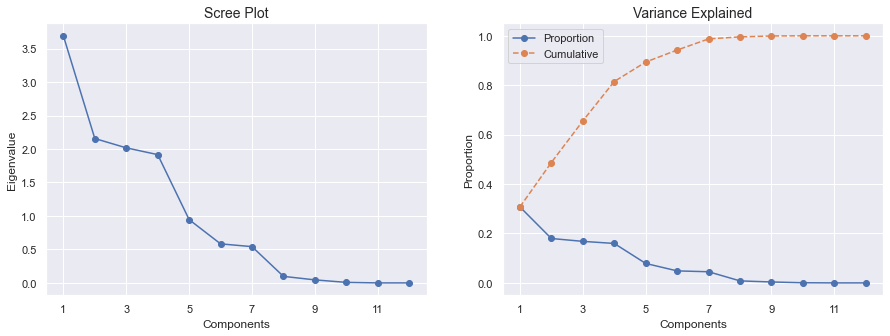

In [62]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [63]:
# Performing PCA again with 4 principal components as it retains approximately 90% of the variance
pca = PCA(n_components=4)
pca_feat = pca.fit_transform(df_pca[metric_features])
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
four_pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  # index=df_pca.index
four_pca_df

,PC0,PC1,PC2,PC3
0,0.328393,-1.647886,-0.351046,-0.167294
1,4.383625,0.686248,2.000001,0.831394
2,1.232174,0.119007,-1.838391,-0.902434
3,1.348300,0.684905,0.377470,1.947172
4,0.053737,-0.330880,0.664724,1.236696
...,...,...,...,...
10155,5.617082,1.270124,-1.293200,0.707438
10156,-2.149879,0.584581,1.003987,0.459891
10157,-0.580570,-1.320823,-2.455455,0.047509
10158,1.728946,0.187764,0.892589,-0.732521


In [64]:
# Reassigning df_pca (copied from df) to contain the four pca variables
df_pca = pd.concat([df_pca, four_pca_df], axis=1)
df_pca.head()

,CustID,FirstPolYear,BirthYear,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,...,x0_3.0,x0_4.0,x1_1.0,x2_2 - High School,x2_3 - BSc/MSc,x2_4 - PhD,PC0,PC1,PC2,PC3
0,1.0,-0.154430,0.807859,-0.332547,0.641664,-0.907073,0.560462,-0.546326,-0.298094,0.141350,...,0.0,0.0,1.0,1.0,0.0,0.0,0.328393,-1.647886,-0.351046,-0.167294
1,2.0,-0.760976,1.558211,-1.861894,-1.373317,1.381258,-1.615793,0.920581,-0.698539,3.414266,...,0.0,1.0,1.0,1.0,0.0,0.0,4.383625,0.686248,2.000001,0.831394
2,3.0,0.755388,0.115226,-0.230590,1.128391,-1.251890,-0.677215,0.085522,-0.592051,1.014453,...,1.0,0.0,0.0,0.0,0.0,0.0,1.232174,0.119007,-1.838391,-0.902434
3,4.0,0.603752,0.750139,-1.431638,-0.924206,0.973747,-0.849848,-0.703580,1.926286,-0.117651,...,0.0,1.0,1.0,0.0,1.0,0.0,1.348300,0.684905,0.377470,1.947172
4,5.0,-0.002794,0.288384,-0.754647,-0.718733,0.691624,0.288932,-0.684195,0.190889,-0.485180,...,0.0,1.0,1.0,0.0,1.0,0.0,0.053737,-0.330880,0.664724,1.236696


In [65]:
#defining a function to analyze the correlation between the four principal components and the metric_features
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings = df_pca[metric_features + pca_feat_names].corr().loc[metric_features, pca_feat_names]
loadings.style.applymap(_color_red_or_green)

,PC0,PC1,PC2,PC3
FirstPolYear,-0.005969,0.264162,-0.826607,0.496868
BirthYear,0.819125,-0.466685,0.039061,0.290274
MonthSal,-0.788127,0.466268,-0.045693,-0.287907
CustMonVal,0.150745,-0.349413,-0.556471,-0.716257
ClaimsRate,0.012383,0.448682,0.548976,0.650940
PremMotor,-0.720492,-0.627021,-0.028048,0.247465
PremHousehold,0.620271,0.273474,-0.132559,-0.348513
PremHealth,0.219989,0.564561,0.126555,-0.072813
PremLife,0.608924,0.363978,0.007703,-0.152848
PremWork,0.617675,0.348194,-0.005346,-0.150640


#### Performing Pandas Profile Report after the PCA Analysis

In [66]:
# ProfileReport(
#     df_pca,
#     title='Customer Data Preprocessed after PCA',
#     correlations={
#         "pearson": {"calculate": True},
#         "spearman": {"calculate": False},
#         "kendall": {"calculate": False},
#         "phi_k": {"calculate": False},
#         "cramers": {"calculate": False},
#     },
# )

In [67]:
#Assigning the data to the 'df' after all preprocessing methods
df_final = df_pca.copy()

#saving a copy of the preprocessed data for future purposes
# df.to_csv('customer_preprocessed', index=True)

In [68]:
#checking the data after all preprocessing transformations
df_final.head()

,CustID,FirstPolYear,BirthYear,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,...,x0_3.0,x0_4.0,x1_1.0,x2_2 - High School,x2_3 - BSc/MSc,x2_4 - PhD,PC0,PC1,PC2,PC3
0,1.0,-0.154430,0.807859,-0.332547,0.641664,-0.907073,0.560462,-0.546326,-0.298094,0.141350,...,0.0,0.0,1.0,1.0,0.0,0.0,0.328393,-1.647886,-0.351046,-0.167294
1,2.0,-0.760976,1.558211,-1.861894,-1.373317,1.381258,-1.615793,0.920581,-0.698539,3.414266,...,0.0,1.0,1.0,1.0,0.0,0.0,4.383625,0.686248,2.000001,0.831394
2,3.0,0.755388,0.115226,-0.230590,1.128391,-1.251890,-0.677215,0.085522,-0.592051,1.014453,...,1.0,0.0,0.0,0.0,0.0,0.0,1.232174,0.119007,-1.838391,-0.902434
3,4.0,0.603752,0.750139,-1.431638,-0.924206,0.973747,-0.849848,-0.703580,1.926286,-0.117651,...,0.0,1.0,1.0,0.0,1.0,0.0,1.348300,0.684905,0.377470,1.947172
4,5.0,-0.002794,0.288384,-0.754647,-0.718733,0.691624,0.288932,-0.684195,0.190889,-0.485180,...,0.0,1.0,1.0,0.0,1.0,0.0,0.053737,-0.330880,0.664724,1.236696


### Visualizing the correlation matrix again to check Relevance vs Redundance

locator: <matplotlib.ticker.AutoLocator object at 0x000001A782E64250>
top of Axes not in the figure, so title not moved
top of Axes not in the figure, so title not moved
top of Axes not in the figure, so title not moved
top of Axes not in the figure, so title not moved
top of Axes not in the figure, so title not moved


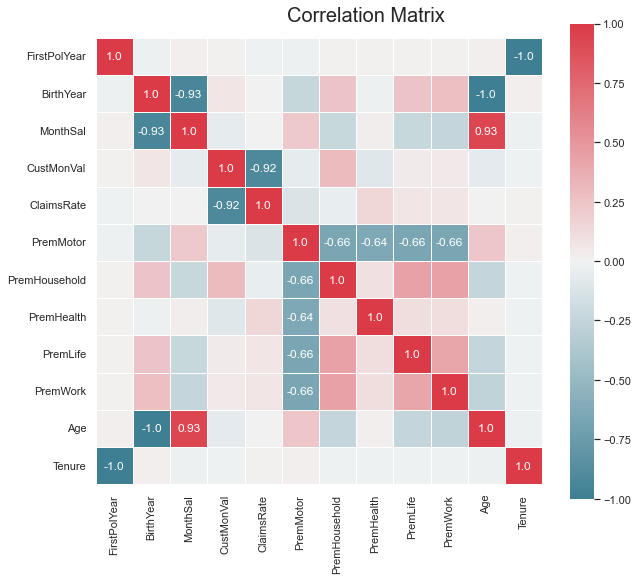

In [69]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df_final[metric_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

#### We decided to drop the features which bring the same information (redundant)

In [70]:
df_final.drop(['FirstPolYear','BirthYear'], axis = 1, inplace = True)

In [71]:
df_final.head(3)

,CustID,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Age,...,x0_3.0,x0_4.0,x1_1.0,x2_2 - High School,x2_3 - BSc/MSc,x2_4 - PhD,PC0,PC1,PC2,PC3
0,1.0,-0.332547,0.641664,-0.907073,0.560462,-0.546326,-0.298094,0.141350,-0.517825,-0.807859,...,0.0,0.0,1.0,1.0,0.0,0.0,0.328393,-1.647886,-0.351046,-0.167294
1,2.0,-1.861894,-1.373317,1.381258,-1.615793,0.920581,-0.698539,3.414266,1.491846,-1.558211,...,0.0,1.0,1.0,1.0,0.0,0.0,4.383625,0.686248,2.000001,0.831394
2,3.0,-0.230590,1.128391,-1.251890,-0.677215,0.085522,-0.592051,1.014453,1.331730,-0.115226,...,1.0,0.0,0.0,0.0,0.0,0.0,1.232174,0.119007,-1.838391,-0.902434


In [72]:
df_final.isna().sum()

CustID                0
MonthSal              0
CustMonVal            0
ClaimsRate            0
PremMotor             0
PremHousehold         0
PremHealth            0
PremLife              0
PremWork              0
Age                   0
Tenure                0
x0_2.0                0
x0_3.0                0
x0_4.0                0
x1_1.0                0
x2_2 - High School    0
x2_3 - BSc/MSc        0
x2_4 - PhD            0
PC0                   0
PC1                   0
PC2                   0
PC3                   0
dtype: int64

<hr>
<a class="anchor" id="clustering">
    
# 6.0 Clustering
    
</a>

In [73]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
#     plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

<hr>
<a class="anchor" id="hierarquical">
    
## 6.1 Hierarquical Clustering
    
</a>

#### Characteristics of Hierarquical Clustering:
- *bottom up approach*: each observation starts in its own cluster, and clusters are successively merged together
- *greedy/local algorithm*: at each iteration tries to minimize the distance of cluster merging
- *no realocation*: after an observation is assigned to a cluster, it can no longer change
- *deterministic*: you always get the same answer when you run it
- *scalability*: can become *very slow* for a large number of observations

In [74]:
# Splitting feature names into groups
non_metric_features = df_final.columns[df_final.columns.str.startswith('x')]
pc_features = df_final.columns[df_final.columns.str.startswith('PC')]
metric_features = df_final.columns[~df_final.columns.str.startswith('x') & ~df_final.columns.str.startswith('PC')  & ~df_final.columns.str.startswith('CustID')]

In [75]:
df_final[metric_features].isna().sum()

MonthSal         0
CustMonVal       0
ClaimsRate       0
PremMotor        0
PremHousehold    0
PremHealth       0
PremLife         0
PremWork         0
Age              0
Tenure           0
dtype: int64

#### Defining the hierarquical linkage method

The following function computes the R2 for a set of cluster solutions given by the application of a hierarchical method. 
The R2 is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable. It is based on SSt = SSw + SSb and R2 = SSb/SSt.

Parameters:
- df (DataFrame): Dataset to apply clustering
- link_method (str): either "ward", "complete", "average", "single"
- max_nclus (int): maximum number of clusters to compare the methods
- min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
- dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
Returns:
- ndarray: R2 values for the range of cluster solutions


In [157]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):

    # return sum of sum of squares of each df variable
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  
    
    # get total sum of squares
    sst = get_ss(df)  
    
    # where we will store the R2 metrics for each cluster solution
    r2 = []  
    
    # iterate over desired ncluster range
    for i in range(min_nclus, max_nclus+1):  
        cluster = AgglomerativeClustering(n_clusters=i, affinity=dist, linkage=link_method)
        
        #get cluster labels
        hclabels = cluster.fit_predict(df) 
        
        # concat df with labels
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels')), axis=1)  
        
        # compute ssw for each cluster labels
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)   #using apply for sum of squares into the group by
        
       
        # remember: SST = SSW + SSB
        ssb = sst - np.sum(ssw_labels) 
        
        # save the R2 of the given cluster solution
        r2.append(ssb / sst)  
        
    return np.array(r2)

##### Using the function created above to compare the R-Squared of different linkage methods

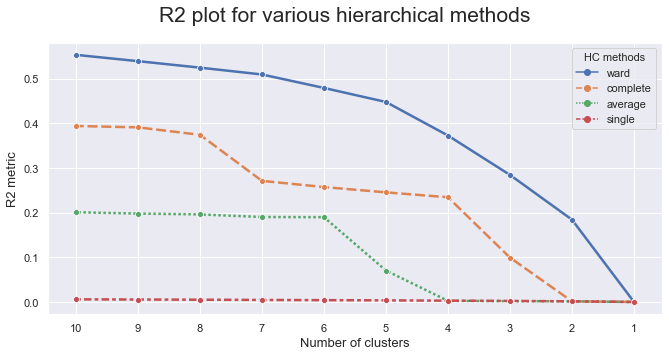

In [158]:
# Prepare input
hc_methods = ["ward", "complete", "average", "single"]

# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack(
    [
        get_r2_hc(df=df_final[metric_features], link_method=link, max_nclus=max_nclus) 
        for link in hc_methods
    ]
).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

#### Defining the number of clusters

In [159]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(df_final[metric_features])

array([7898, 9801, 5977, ...,    1,    2,    0], dtype=int64)

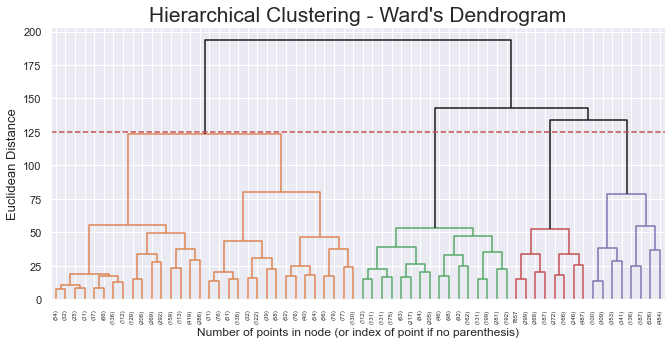

In [160]:
# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 125
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

#### Solution using Hierarquical Clustering
- From the dendogram above we decided to keep 4 clusters that are going to be analyzed in the following steps

In [80]:
# 4 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc4lust = AgglomerativeClustering(linkage=linkage, affinity=distance, n_clusters=4)
hc4_labels = hc4lust.fit_predict(df_final[metric_features])

In [81]:
# Characterizing the 4 Clusteres and storing in the dataframe 'df_hc4'
df_hc4 = pd.concat((df_final, pd.Series(hc4_labels, name='labels') ), axis=1)
df_hc4.groupby('labels').mean()

,CustID,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Age,...,x0_3.0,x0_4.0,x1_1.0,x2_2 - High School,x2_3 - BSc/MSc,x2_4 - PhD,PC0,PC1,PC2,PC3
labels,,,,,,,,,,,,,,,,,,,,,
0,5171.605634,-0.982432,0.077053,0.053836,-0.732553,0.502205,0.427603,0.501198,0.529595,-1.030282,...,0.198908,0.402127,0.858580,0.397815,0.352975,0.032193,2.103168,-0.156223,0.111380,0.212945
1,5084.812397,0.352623,0.935810,-1.182672,0.679040,-0.263333,-0.594588,-0.416251,-0.411051,0.369090,...,0.203202,0.398194,0.744253,0.283251,0.556650,0.103859,-1.065260,-1.018945,-0.855086,-0.985328
2,5138.398448,1.047692,-0.368217,0.385670,-0.480122,0.043108,0.648831,0.200441,0.152079,1.091106,...,0.196205,0.418284,0.304010,0.393273,0.451919,0.045709,-1.006428,1.806168,0.178337,-0.420675
3,5227.195223,0.067132,-0.879442,0.934230,1.042477,-0.625991,-0.801586,-0.620199,-0.619839,0.080462,...,0.203531,0.392004,0.877985,0.245587,0.600208,0.116822,-1.239897,-0.603767,0.665596,1.368104


In [82]:
#printing the number of observations in each cluster
print(df_hc4["labels"].value_counts())

0    3479
1    2436
2    2319
3    1926
Name: labels, dtype: int64


In [83]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

In [84]:
df_hc_r2 = ['MonthSal','ClaimsRate','PremMotor','PremHousehold','PremHealth','PremLife','PremWork','Age','Tenure','labels']
df_hc_r2

['MonthSal',
 'ClaimsRate',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork',
 'Age',
 'Tenure',
 'labels']

In [85]:
# Computing the R^2 of the cluster solution

# get total sum of squares
sst = get_ss(df_final[metric_features])  

# compute ssw for each cluster labels
ssw_labels = df_hc4[df_hc_r2].groupby(by='labels').apply(get_ss) 

ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB

r2 = ssb / sst

print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.4338


findfont: Matching sans\-serif:style=normal:variant=normal:weight=heavy:stretch=normal:size=13.0.
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.43
findfont: score(FontEntry(fname='C

findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFiveSymReg.ttf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.145
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-da

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\constan.ttf', name='Constantia', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\consola.ttf', name='Consolas', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\trebuc.ttf', name='Trebuchet MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\timesbi.ttf', name='Times New Roman', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoepr.ttf', name='Segoe Print', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbeli.ttf', name='Corbel', style='italic', variant='normal'

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Candarali.ttf', name='Candara', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.43
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\gadugi.ttf', name='Gadugi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Candarai.ttf', name='Candara', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.43
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\sylfaen.ttf', name='Sylfaen', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Nirmala.ttf', name='Nirmala UI', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='C:\\ProgramData\\Kingsoft\\office6\\mtfont\\mtextra.ttf', name='MT Extra', style='normal', variant

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ariali.ttf', name='Arial', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.43
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\courbi.ttf', name='Courier New', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\NirmalaB.ttf', name='Nirmala UI', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguibli.ttf', name='Segoe UI', style='italic', variant='normal', weight=900, stretch='normal', size='scalable')) = 11.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\YuGothR.ttc', name='Yu Gothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\gadugib.ttf', name='Gadugi', style='normal', variant='normal', weight=70

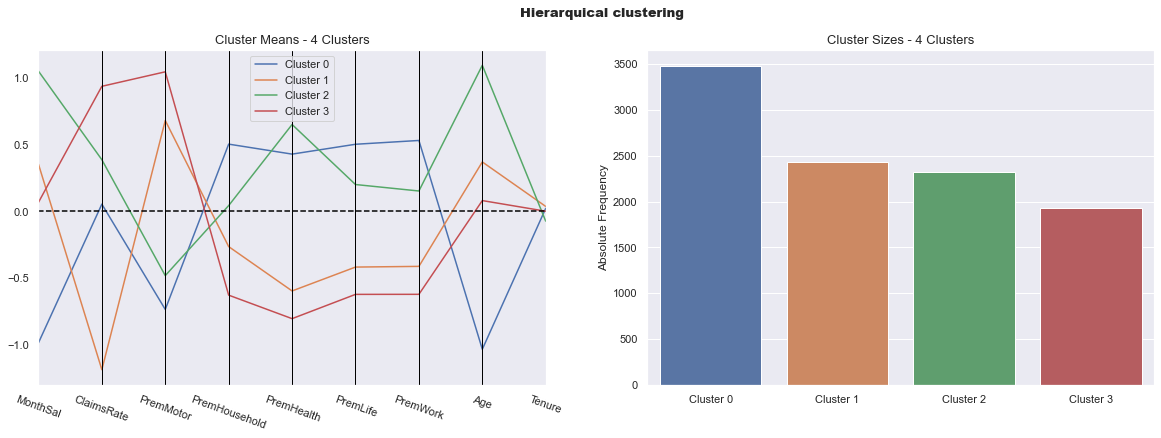

In [86]:
cluster_profiles(
    df = df_hc4[df_hc_r2], 
    label_columns = ['labels'], 
    figsize = (20, 6), 
    compar_titles = ["Hierarquical clustering"]
)

<hr>
<a class="anchor" id="k-means">
    
## 6.2 K-Means Clustering
    
</a>

#### Characteristics of K-Means:
- *Number of clusters* need to be set apriori
- One of the *fastest* clustering algorithms
- The results *depend on the initialization* (stochastic)
- Prone to *local optima*
- Favors *convex* (round shape) and *isotropic* (same shape) clusters

### K-means using the metric features

#### Defining the number of clusters

In [87]:
#creating a range to iterate the number of clusters
range_clusters = range(1,11)

inertia = []

# iterate over desired ncluster range
for n_clus in range_clusters:  
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    # fit the clusterer
    kmclust.fit(df_final[metric_features])
    
    # save the inertia of the given cluster solution
    inertia.append(kmclust.inertia_) 

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=15.0.
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='

findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFiveSymReg.ttf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Users\\gabriel.souza_ifood\\anaconda3\\envs\\data-mining-env\\lib\\site-packages\\matplotlib\\mpl-da

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\constan.ttf', name='Constantia', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\consola.ttf', name='Consolas', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\trebuc.ttf', name='Trebuchet MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\timesbi.ttf', name='Times New Roman', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoepr.ttf', name='Segoe Print', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbeli.ttf', name='Corbel', style='italic', variant='normal'

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Candarali.ttf', name='Candara', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\gadugi.ttf', name='Gadugi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Candarai.ttf', name='Candara', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\sylfaen.ttf', name='Sylfaen', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Nirmala.ttf', name='Nirmala UI', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\ProgramData\\Kingsoft\\office6\\mtfont\\mtextra.ttf', name='MT Extra', style='normal', variant

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ariali.ttf', name='Arial', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\courbi.ttf', name='Courier New', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\NirmalaB.ttf', name='Nirmala UI', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguibli.ttf', name='Segoe UI', style='italic', variant='normal', weight=900, stretch='normal', size='scalable')) = 11.525
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\YuGothR.ttc', name='Yu Gothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\gadugib.ttf', name='Gadugi', style='normal', variant='normal', weight=70

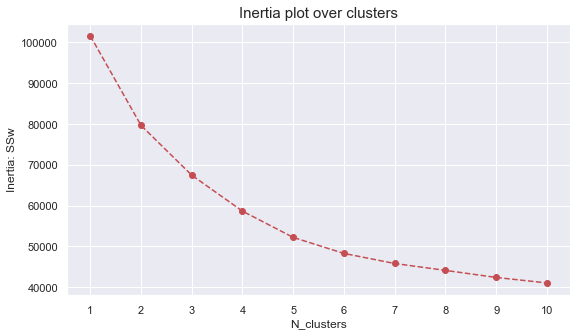

In [88]:
# Plotting the inertia to determine the number of clusters
plt.figure(figsize=(9,5))
# plt.plot(inertia)
x = range(1,11)
xi = list(range(len(x)))
y = inertia
# plot the index for the x-values
plt.plot(xi, y, marker='o', linestyle='--', color='r', label='Square')

plt.xlabel('N_clusters')
plt.ylabel('Inertia: SSw') 
plt.xticks(xi, x)
plt.title("Inertia plot over clusters", size=15)
plt.show()

For n_clusters = 2, the average silhouette_score is : 0.2566264139543907
For n_clusters = 3, the average silhouette_score is : 0.19518419578490087
For n_clusters = 4, the average silhouette_score is : 0.20630829970541942
For n_clusters = 5, the average silhouette_score is : 0.21446165687690238
For n_clusters = 6, the average silhouette_score is : 0.2215836544501521
For n_clusters = 7, the average silhouette_score is : 0.20727626410411168
For n_clusters = 8, the average silhouette_score is : 0.18211213509413735
For n_clusters = 9, the average silhouette_score is : 0.16738899309441557
For n_clusters = 10, the average silhouette_score is : 0.18252400971744986


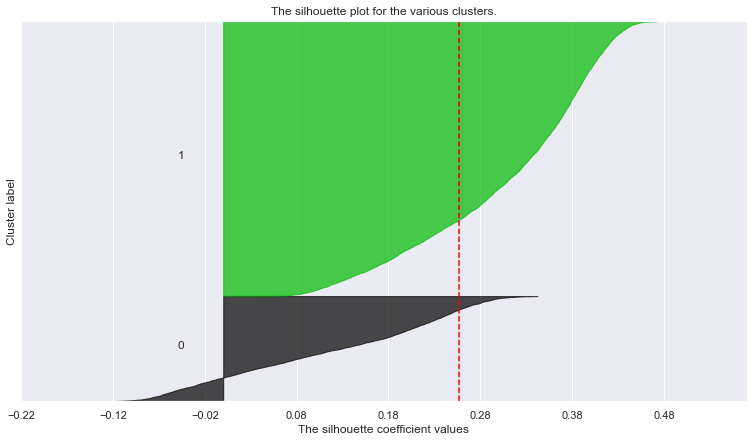

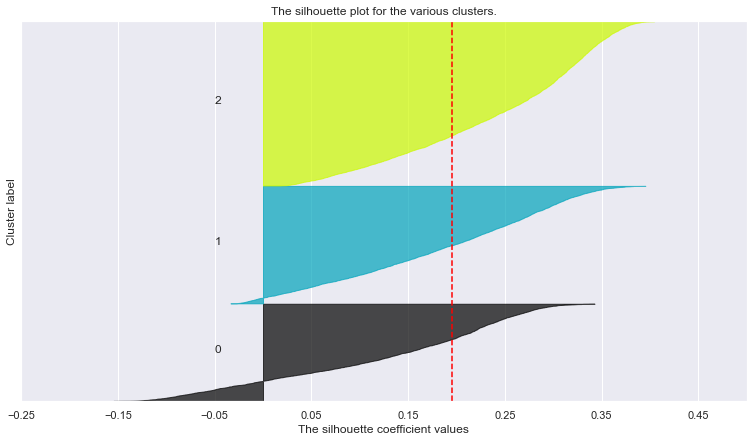

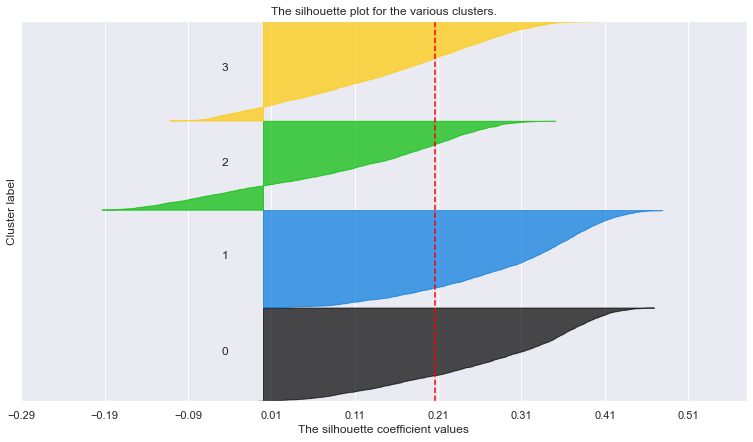

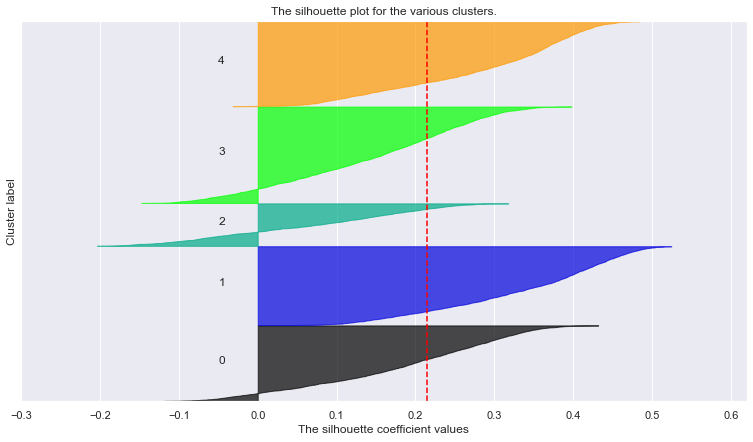

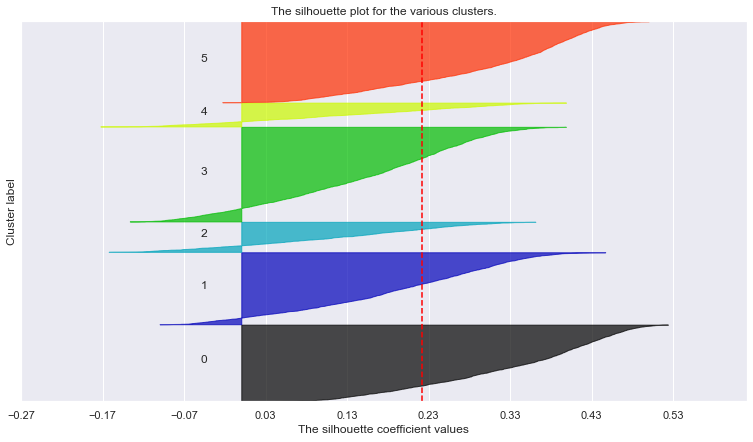

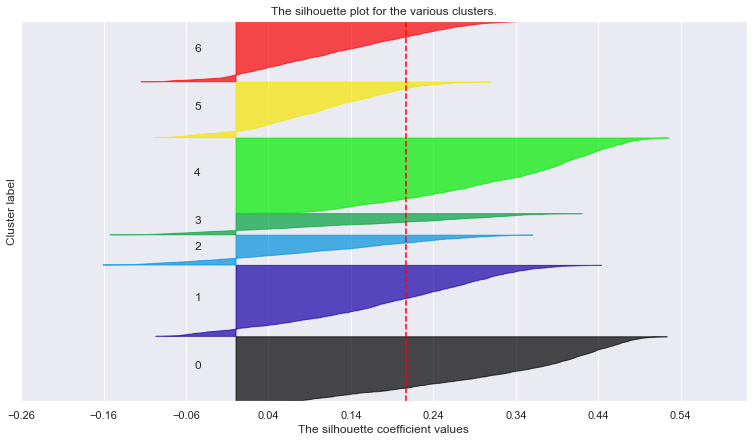

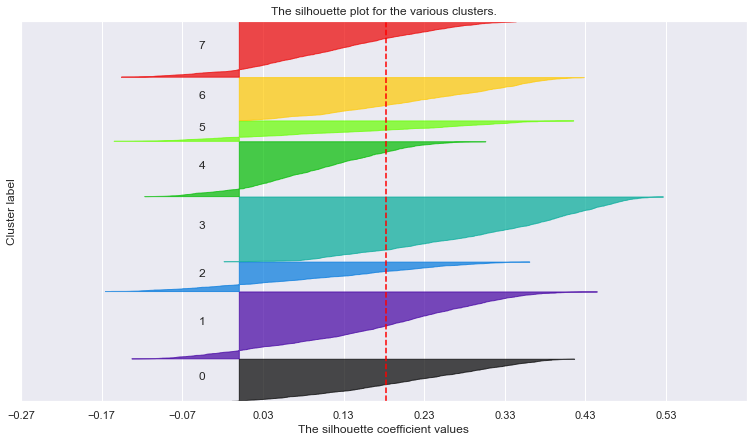

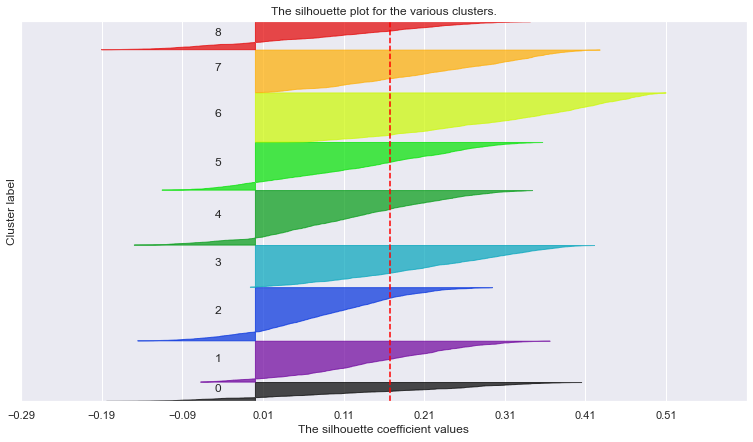

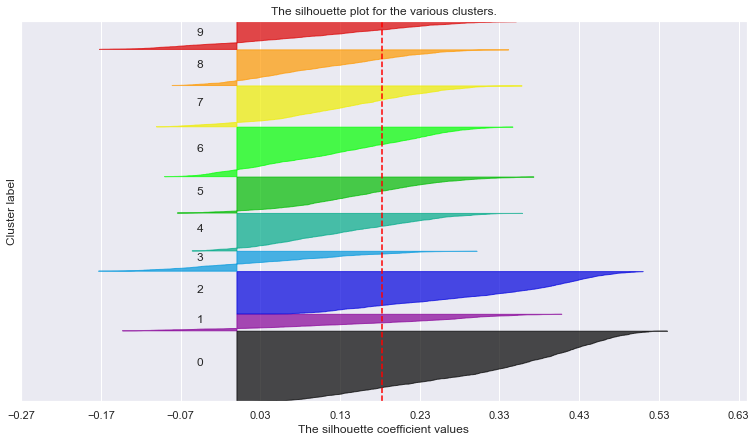

In [89]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df_final[metric_features])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_final[metric_features], cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_final[metric_features], cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_final[metric_features]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

#### Clustering with metric features and 3 clusters

In [90]:
# final cluster solution
number_clusters =  3
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(df_final[metric_features])
km_labels

array([2, 0, 0, ..., 2, 0, 2])

In [91]:
# Characterizing the final clusters
df_kmclust_3 = pd.concat((df_final, pd.Series(km_labels, name='labels')), axis=1)
df_kmclust_3.groupby('labels').mean()

,CustID,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Age,...,x0_3.0,x0_4.0,x1_1.0,x2_2 - High School,x2_3 - BSc/MSc,x2_4 - PhD,PC0,PC1,PC2,PC3
labels,,,,,,,,,,,,,,,,,,,,,
0,5242.536071,-1.118701,0.159936,0.068016,-1.060963,0.848517,0.435590,0.830060,0.848500,-1.170414,...,0.200691,0.402533,0.828473,0.426324,0.287030,0.019186,2.727733,0.067242,0.051660,0.059000
1,5155.106383,1.032314,-0.099637,0.139772,-0.384259,0.089247,0.549728,0.099078,0.079397,1.062868,...,0.190537,0.419816,0.341061,0.392506,0.457923,0.050810,-1.044196,1.516719,0.012609,-0.659899
2,5100.264245,-0.076146,-0.023390,-0.140157,0.902361,-0.565783,-0.650679,-0.561892,-0.558731,-0.067395,...,0.206810,0.391146,0.899659,0.252440,0.589784,0.110329,-0.867264,-1.124037,-0.039576,0.436837


In [92]:
df_kmclust_3.shape

(10160, 23)

In [93]:
#printing the number of observations in each cluster
print(df_kmclust_3["labels"].value_counts())

2    4405
1    3149
0    2606
Name: labels, dtype: int64


In [94]:
df_km_r2 = ['MonthSal','ClaimsRate','PremMotor','PremHousehold','PremHealth','PremLife','PremWork','Age','Tenure','labels']
df_km_r2

['MonthSal',
 'ClaimsRate',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork',
 'Age',
 'Tenure',
 'labels']

In [95]:
# Computing the R^2 of the cluster solution

# get total sum of squares
sst = get_ss(df_final[metric_features])  

# compute ssw for each cluster labels
ssw_labels = df_kmclust_3[df_km_r2].groupby(by='labels').apply(get_ss) 

ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB

r2 = ssb / sst

print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.4352


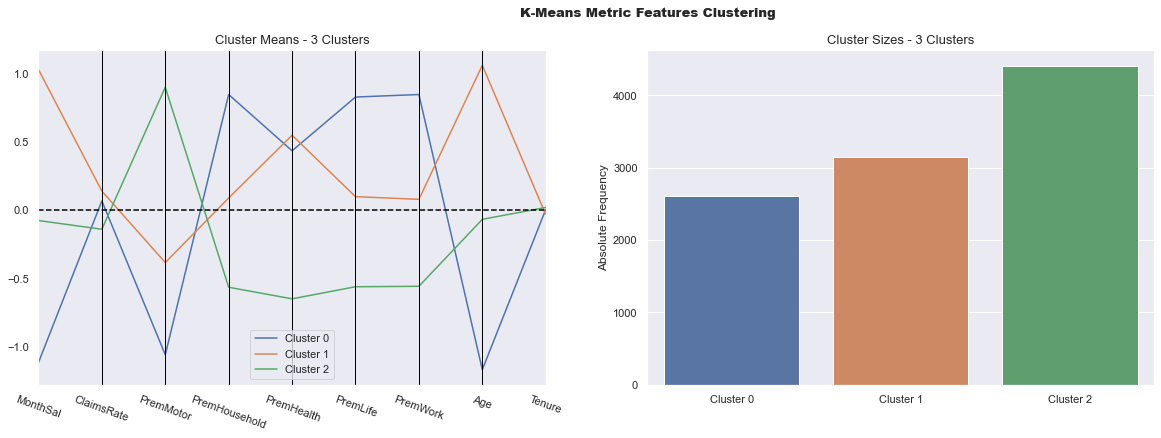

In [96]:
cluster_profiles(
    df = df_kmclust_3[df_km_r2], 
    label_columns = ['labels'], 
    figsize = (20, 6), 
    compar_titles = ["K-Means Metric Features Clustering"]
)

### K-means using the PCA features

#### Defining the number of clusters

In [97]:
#creating a range to iterate the number of clusters
range_clusters = range(1,11)

inertia = []

# iterate over desired ncluster range
for n_clus in range_clusters:  
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    # fit the clusterer
    kmclust.fit(df_final[pc_features])
    
    # save the inertia of the given cluster solution
    inertia.append(kmclust.inertia_) 

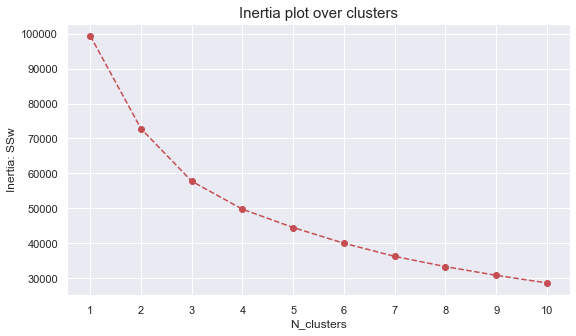

In [98]:
# Plotting the inertia to determine the number of clusters
plt.figure(figsize=(9,5))
# plt.plot(inertia)
x = range(1,11)
xi = list(range(len(x)))
y = inertia
# plot the index for the x-values
plt.plot(xi, y, marker='o', linestyle='--', color='r', label='Square')

plt.xlabel('N_clusters')
plt.ylabel('Inertia: SSw') 
plt.xticks(xi, x)
plt.title("Inertia plot over clusters", size=15)
plt.show()

#### Clustering with PCA features and 3 clusters

In [99]:
# final cluster solution
number_clusters =  3
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_pc_labels = kmclust.fit_predict(df_final[pc_features])
km_pc_labels

array([1, 0, 0, ..., 1, 0, 1])

In [100]:
# Characterizing the final clusters
df_kmclust_pca_3 = pd.concat((df_final, pd.Series(km_pc_labels, name='labels')), axis=1)
df_kmclust_pca_3.groupby('labels').mean()

,CustID,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Age,...,x0_3.0,x0_4.0,x1_1.0,x2_2 - High School,x2_3 - BSc/MSc,x2_4 - PhD,PC0,PC1,PC2,PC3
labels,,,,,,,,,,,,,,,,,,,,,
0,5248.464088,-1.140448,0.140846,0.085528,-1.074924,0.851282,0.444618,0.844878,0.858502,-1.203038,...,0.202841,0.400947,0.827151,0.423441,0.286109,0.019337,2.778077,0.070630,0.052622,0.099195
1,5100.096519,-0.171678,-0.024513,-0.138759,0.880739,-0.564785,-0.614477,-0.562584,-0.554927,-0.168860,...,0.205042,0.393758,0.925570,0.263625,0.579592,0.106363,-0.727890,-1.202985,0.002339,0.476419
2,5148.983820,1.041588,-0.073622,0.104364,-0.272875,0.056395,0.413937,0.058434,0.039245,1.084022,...,0.192430,0.415487,0.359723,0.372147,0.476452,0.058943,-1.158043,1.395971,-0.041343,-0.645953


In [101]:
#printing the number of observations in each cluster
print(df_kmclust_pca_3["labels"].value_counts())

1    4165
2    3461
0    2534
Name: labels, dtype: int64


In [102]:
df_kmpca_r2 = ['PC0','PC1','PC2','PC3','labels']
df_kmpca_r2

['PC0', 'PC1', 'PC2', 'PC3', 'labels']

In [103]:
# Computing the R^2 of the cluster solution

# get total sum of squares
sst = get_ss(df_final[metric_features])  

# compute ssw for each cluster labels
ssw_labels = df_kmclust_pca_3[df_kmpca_r2].groupby(by='labels').apply(get_ss) 

ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB

r2 = ssb / sst

print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.4316


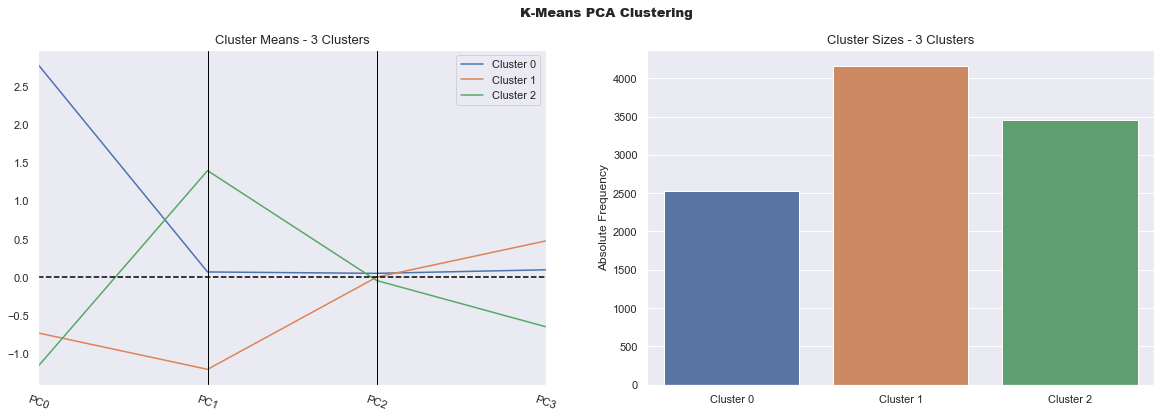

In [104]:
cluster_profiles(
    df = df_kmclust_pca_3[df_kmpca_r2], 
    label_columns = ['labels'], 
    figsize = (20, 6), 
    compar_titles = ["K-Means PCA Clustering"]
)

<hr>
<a class="anchor" id="meanshift">
    
## 6.3 Density Based - Mean Shift Clustering
    
</a>

### Characteristics:
- No need to define number of clusters apriori
- Can detect clusters of any shape
- Robust to outliers
- Depends on the bandwidth hyperparameter (but there's a way to estimate it)
- **Main drawback**: Poor scalability (on both the algorithm and in estimating the bandwidth)

In [105]:
# The following bandwidth can be automatically detected using (we need to set quantile though)
# Based on distance to nearest neighbors for all observations
bandwidth = estimate_bandwidth(df_final[metric_features], quantile=0.08, random_state=1, n_jobs=4)
bandwidth

2.5345899150222944

In [106]:
# Perform mean-shift clustering with bandwidth set using estimate_bandwidth
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(df_final[metric_features])

ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 1


In [107]:
ms_labels.shape

(10160,)

In [108]:
# Concatenating the labels to df
df_meanshift = pd.concat([df_final[metric_features], pd.Series(ms_labels, index=df_final.index, name="ms_labels")], axis=1)


#grouping and calculating the variables mean
df_meanshift.groupby('ms_labels').mean()

,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Age,Tenure
ms_labels,,,,,,,,,,
0,2.311690e-16,1.650036e-17,-1.267140e-16,3.772136e-17,1.646212e-17,-2.477240e-17,1.220153e-16,4.144760e-17,-2.316170e-16,-4.372050e-16


In [109]:
#printing the number of observations in each cluster
print(df_meanshift["ms_labels"].value_counts())

0    10160
Name: ms_labels, dtype: int64


In [110]:
df_meanshift_r2 = ['MonthSal','ClaimsRate','PremMotor','PremHousehold','PremHealth','PremLife','PremWork','Age','Tenure','ms_labels']
df_meanshift_r2

['MonthSal',
 'ClaimsRate',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork',
 'Age',
 'Tenure',
 'ms_labels']

In [111]:
# Computing the R^2 of the cluster solution

# get total sum of squares
sst = get_ss(df_final[metric_features])  

# compute ssw for each cluster labels
ssw_labels = df_meanshift[df_meanshift_r2].groupby(by='ms_labels').apply(get_ss) 

ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB

r2 = ssb / sst

print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.1000


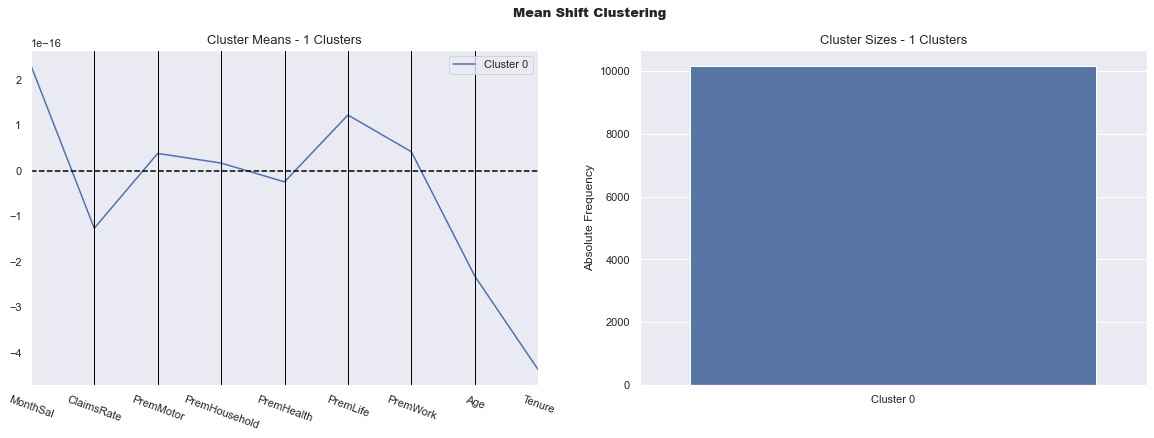

In [112]:
cluster_profiles(
    df = df_meanshift[df_meanshift_r2], 
    label_columns = ['ms_labels'], 
    figsize = (20, 6), 
    compar_titles = ["Mean Shift Clustering"]
)

<hr>
<a class="anchor" id="dbscan">
    
## 6.4 Density Based - DBSCAN Clustering
    
</a>

### Characteristics:
- No need to define number of clusters apriori
- Resistant to noise and outliers
- Can identify outliers
- Can handle clusters of different shapes and sizes
- Depends highly on the epsilon hyperparameter and it can be hard to tune
- Does not work well with clusters of varying densities

### Defining eps and min_samples:
- **MinPts**: As a rule of thumb, **minPts = 2 x dim** can be used, but it may be necessary to choose larger values for very large data, for noisy data or for data that contains many duplicates.

- **ε**: The value for ε can then be chosen by using a **k-distance graph**, plotting the distance to the kth (k = minPts - 1) nearest neighbor ordered from the largest to the smallest value. Good values of ε are where this plot shows an **"elbow"**: if ε is chosen much too small, a large part of the data will not be clustered; whereas for a too high value of ε, clusters will merge and the majority of objects will be in the same cluster. **The assumption is that for points in a cluster, their k nearest neighbors are at roughly the same distance**. Noise points have their k-th nearest neighbors at farther distance

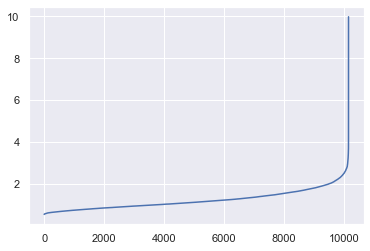

In [113]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(df_final[metric_features])
distances, _ = neigh.kneighbors(df_final[metric_features])
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

In [114]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=2, min_samples=20, n_jobs=4)
dbscan_labels = dbscan.fit_predict(df_final[metric_features])

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 2


In [115]:
# Concatenating the labels to df
df_clust_dbscan = pd.concat([df_final[metric_features], pd.Series(dbscan_labels, index=df_final.index, name="dbscan_labels")], axis=1)

#grouping and calculating the variables mean
df_clust_dbscan.groupby('dbscan_labels').mean()

,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Age,Tenure
dbscan_labels,,,,,,,,,,
-1,-0.693955,0.712340,-0.072854,-1.558552,2.019362,-0.717193,1.978446,1.926084,-0.771169,0.120342
0,0.008924,-0.009161,0.000937,0.020043,-0.025969,0.009223,-0.025443,-0.024770,0.009917,-0.001548


In [116]:
#printing the number of observations in each cluster
print(df_clust_dbscan["dbscan_labels"].value_counts())

 0    10031
-1      129
Name: dbscan_labels, dtype: int64


In [117]:
df_dbscan_r2 = ['MonthSal','ClaimsRate','PremMotor','PremHousehold','PremHealth','PremLife','PremWork','Age','Tenure','dbscan_labels']
df_dbscan_r2

['MonthSal',
 'ClaimsRate',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork',
 'Age',
 'Tenure',
 'dbscan_labels']

In [118]:
# Computing the R^2 of the cluster solution

# get total sum of squares
sst = get_ss(df_final[metric_features])  

# compute ssw for each cluster labels
ssw_labels = df_clust_dbscan[df_dbscan_r2].groupby(by='dbscan_labels').apply(get_ss) 

ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB

r2 = ssb / sst

print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.1202


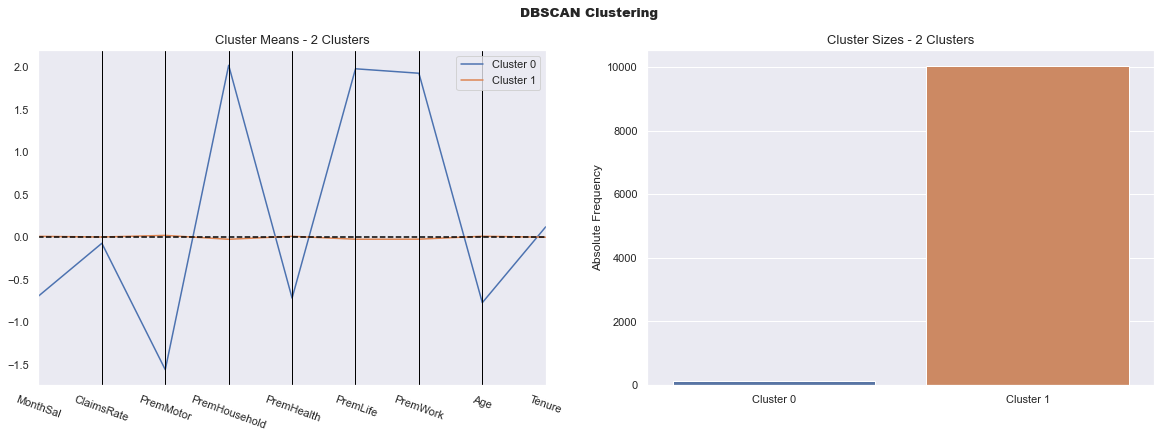

In [119]:
cluster_profiles(
    df = df_clust_dbscan[df_dbscan_r2], 
    label_columns = ['dbscan_labels'], 
    figsize = (20, 6), 
    compar_titles = ["DBSCAN Clustering"]
)

<hr>
<a class="anchor" id="som">
    
## 6.5 SOM - Self Organizing Maps
    
</a>

### Characteristics:
- Grid shape needs to be set a priori
- Results depend on the initialization (even tough it can be quite robust to it)
- Fitting a SOM can be computationally expensive
- Capable of finding the global optimum (theoretically - if the LR -> 0)
- Visualization tool for high-dimensional data

In [120]:
df_som = df_final.copy()

In [121]:
# This som implementation does not have a random seed parameter
# We're going to set it up ourselves
np.random.seed(42)

sm = sompy.SOMFactory().build(
    df_som[metric_features].values, 
    mapsize=[10, 10],  # NEEDS TO BE A LIST
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=metric_features
)
sm.train(n_job=4, verbose='info', train_rough_len=100, train_finetune_len=100)

df_som['som_labels'] = sm._bmu[0]
df_som.groupby('som_labels').mean()

 Training...
 random_initialization took: 0.001000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  0.031000, quantization error: 3.933500

 epoch: 2 ---> elapsed time:  0.027000, quantization error: 2.952776

 epoch: 3 ---> elapsed time:  0.027000, quantization error: 2.900177

 epoch: 4 ---> elapsed time:  0.027000, quantization error: 2.862829

 epoch: 5 ---> elapsed time:  0.027000, quantization error: 2.827677

 epoch: 6 ---> elapsed time:  0.029000, quantization error: 2.810370

 epoch: 7 ---> elapsed time:  0.030000, quantization error: 2.799456

 epoch: 8 ---> elapsed time:  0.027000, quantization error: 2.793120

 epoch: 9 ---> elapsed time:  0.030000, quantization error: 2.789330

 epoch: 10 ---> elapsed time:  0.031000, quantization error: 2.785495

 epoch: 11 ---> elapsed time:  0.031000, quantization error: 2.780658

 epoch: 12 ---> elapsed time:  0.033000, quantization error: 2.772630

 epoch: 13 ---> 

 epoch: 14 ---> elapsed time:  0.033000, quantization error: 1.714695

 epoch: 15 ---> elapsed time:  0.034000, quantization error: 1.714366

 epoch: 16 ---> elapsed time:  0.034000, quantization error: 1.714026

 epoch: 17 ---> elapsed time:  0.033000, quantization error: 1.713638

 epoch: 18 ---> elapsed time:  0.033000, quantization error: 1.713484

 epoch: 19 ---> elapsed time:  0.034000, quantization error: 1.713222

 epoch: 20 ---> elapsed time:  0.033000, quantization error: 1.712949

 epoch: 21 ---> elapsed time:  0.034000, quantization error: 1.712694

 epoch: 22 ---> elapsed time:  0.034000, quantization error: 1.712321

 epoch: 23 ---> elapsed time:  0.033000, quantization error: 1.711694

 epoch: 24 ---> elapsed time:  0.032000, quantization error: 1.711162

 epoch: 25 ---> elapsed time:  0.032000, quantization error: 1.710568

 epoch: 26 ---> elapsed time:  0.033000, quantization error: 1.709869

 epoch: 27 ---> elapsed time:  0.034000, quantization error: 1.709201

 epoch

,CustID,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Age,...,x0_3.0,x0_4.0,x1_1.0,x2_2 - High School,x2_3 - BSc/MSc,x2_4 - PhD,PC0,PC1,PC2,PC3
som_labels,,,,,,,,,,,,,,,,,,,,,
0.0,5330.657459,-0.128752,-1.011799,1.097404,1.491550,-0.816385,-1.354870,-0.782469,-0.769107,-0.085250,...,0.176796,0.364641,0.939227,0.204420,0.602210,0.165746,-1.418434,-1.309766,1.092614,1.606975
1.0,5279.491379,-0.096975,-0.964875,1.030496,1.472874,-0.759768,-1.346042,-0.758537,-0.749443,-0.046759,...,0.178161,0.416667,0.942529,0.215517,0.620690,0.143678,-1.428036,-0.857771,-0.306480,2.336813
2.0,5025.181159,0.468979,-0.928170,0.971476,1.091595,-0.633154,-0.929901,-0.621501,-0.585362,0.487899,...,0.188406,0.347826,0.891304,0.202899,0.644928,0.079710,-1.786529,0.088437,-0.468986,1.861403
3.0,5308.720238,0.941867,-0.869328,0.914225,0.818111,-0.504141,-0.621169,-0.492303,-0.463025,0.924410,...,0.196429,0.363095,0.684524,0.244048,0.607143,0.119048,-2.087756,0.752511,-0.362219,1.292505
4.0,4995.445122,1.242657,-0.868537,0.905510,0.396888,-0.391137,0.034049,-0.442443,-0.435075,1.252441,...,0.170732,0.457317,0.323171,0.262195,0.615854,0.085366,-2.194370,1.396259,0.080725,0.683256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95.0,5382.360390,-0.829100,-0.621345,0.632696,-0.168186,-0.326625,0.843470,-0.287554,-0.252986,-0.854709,...,0.211039,0.353896,0.954545,0.314935,0.538961,0.084416,0.912162,-0.615025,1.814278,0.511343
96.0,4792.598361,-1.069667,-0.748707,0.783481,-0.910386,-0.067035,1.599413,0.043791,0.139853,-1.072564,...,0.168033,0.446721,0.918033,0.463115,0.434426,0.024590,1.864493,0.262411,1.402569,0.841066
97.0,5282.000000,-1.129506,-0.822464,0.864877,-1.119823,0.445743,0.937952,0.798372,0.587445,-1.147262,...,0.185629,0.359281,0.832335,0.508982,0.293413,0.000000,2.498512,0.486640,1.289434,0.746387


In [122]:
# # Visualizing the Component planes (feature values)
# sns.set()
# view2D = View2D(12,12,"", text_size=10)
# view2D.show(sm, col_sz=3, what='codebook')
# plt.subplots_adjust(top=0.90)
# plt.suptitle("Component Planes", fontsize=20)
# plt.show()

#### U-matrix
Encode each neuron in the output space with the **average distance** to its neighbors in the input space.

Analyse these plots from the following perspectives:
- Clusters of units
- Pontential outliers (units which are very distant from its neighbors and have low frequency)

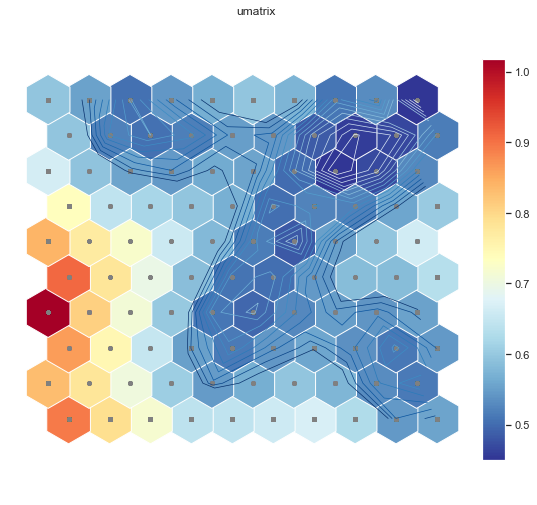

array([[0.59616876, 0.55311223, 0.50432157, 0.54153799, 0.56749308,
        0.59510222, 0.57449373, 0.50998216, 0.53263184, 0.45215484],
       [0.59554846, 0.52042735, 0.50550266, 0.51910225, 0.54819406,
        0.54190317, 0.48513478, 0.45737894, 0.46762475, 0.51504891],
       [0.66516869, 0.5942454 , 0.5561051 , 0.54496271, 0.56243597,
        0.55519439, 0.49975157, 0.45055297, 0.46982354, 0.52701087],
       [0.73585826, 0.64247597, 0.61903251, 0.59678568, 0.56874816,
        0.50271791, 0.52154696, 0.51943544, 0.55796528, 0.60263669],
       [0.83978285, 0.77216093, 0.72234565, 0.65491813, 0.58114783,
        0.51673968, 0.48331096, 0.5512442 , 0.59627283, 0.66348385],
       [0.90932687, 0.77932244, 0.69560372, 0.58793309, 0.50813936,
        0.50367891, 0.54423298, 0.58563612, 0.58582338, 0.6338528 ],
       [1.01848728, 0.80803194, 0.71186749, 0.60023439, 0.50836074,
        0.4955973 , 0.52763291, 0.54942369, 0.54039956, 0.55451643],
       [0.86255624, 0.74850508, 0.6488726

In [123]:
# Here you have U-matrix
u = sompy.umatrix.UMatrixView(9, 9, 'umatrix', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    sm, 
    distance=2, 
    row_normalized=False,
    show_data=True, 
    contour=True, # Visualize isomorphic curves
    blob=False
)

np.flip(UMAT[1], axis=1) # U-matrix values - they match with the plot colors

#### Hit-map
Show the **frequency** of each Unit in the output map

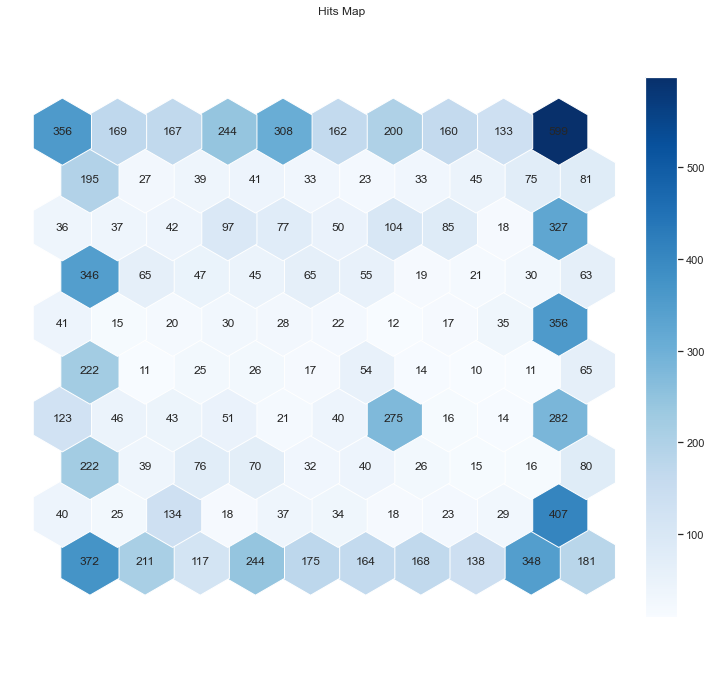

In [124]:
vhts  = BmuHitsView(12,12,"Hits Map")
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=12, cmap="Blues")
plt.show()

### SOM + K-Means 

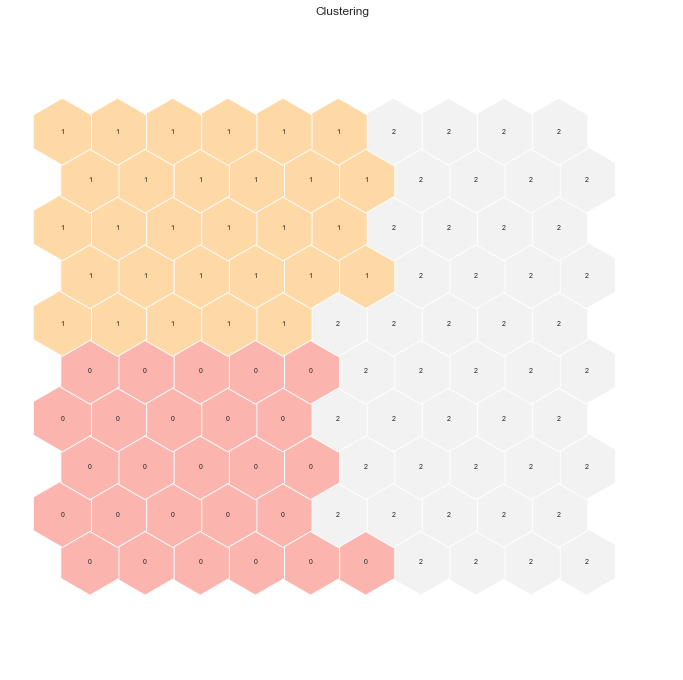

In [125]:
# Perform K-Means clustering on top of the 2500 untis (sm.get_node_vectors() output)
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=20, random_state=42)

nodeclus_labels = kmeans.fit_predict(sm.codebook.matrix)
# setting the cluster labels of sompy
sm.cluster_labels = nodeclus_labels  


hits = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [126]:
#creating a df with the som units as the indexes and the labels from the Kmeans clustering
df_Ksom = pd.DataFrame(nodeclus_labels,columns={'labelKmeans'})

#merging the results in a single df
df_som = df_som.join(df_Ksom['labelKmeans'], on="som_labels")
df_som.head()

,CustID,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Age,...,x1_1.0,x2_2 - High School,x2_3 - BSc/MSc,x2_4 - PhD,PC0,PC1,PC2,PC3,som_labels,labelKmeans
0,1.0,-0.332547,0.641664,-0.907073,0.560462,-0.546326,-0.298094,0.141350,-0.517825,-0.807859,...,1.0,1.0,0.0,0.0,0.328393,-1.647886,-0.351046,-0.167294,82.0,2
1,2.0,-1.861894,-1.373317,1.381258,-1.615793,0.920581,-0.698539,3.414266,1.491846,-1.558211,...,1.0,1.0,0.0,0.0,4.383625,0.686248,2.000001,0.831394,99.0,1
2,3.0,-0.230590,1.128391,-1.251890,-0.677215,0.085522,-0.592051,1.014453,1.331730,-0.115226,...,0.0,0.0,0.0,0.0,1.232174,0.119007,-1.838391,-0.902434,59.0,1
3,4.0,-1.431638,-0.924206,0.973747,-0.849848,-0.703580,1.926286,-0.117651,-0.259973,-0.750139,...,1.0,0.0,1.0,0.0,1.348300,0.684905,0.377470,1.947172,96.0,1
4,5.0,-0.754647,-0.718733,0.691624,0.288932,-0.684195,0.190889,-0.485180,0.035262,-0.288384,...,1.0,0.0,1.0,0.0,0.053737,-0.330880,0.664724,1.236696,33.0,2


In [127]:
df_som_kmeans_r2 = ['MonthSal','ClaimsRate','PremMotor','PremHousehold','PremHealth','PremLife','PremWork','Age','Tenure','labelKmeans']
df_som_kmeans_r2

['MonthSal',
 'ClaimsRate',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork',
 'Age',
 'Tenure',
 'labelKmeans']

In [128]:
# Computing the R^2 of the cluster solution

# get total sum of squares
sst = get_ss(df_final[metric_features])  

# compute ssw for each cluster labels
ssw_labels = df_som[df_som_kmeans_r2].groupby(by='labelKmeans').apply(get_ss) 

ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB

r2 = ssb / sst

print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.4211


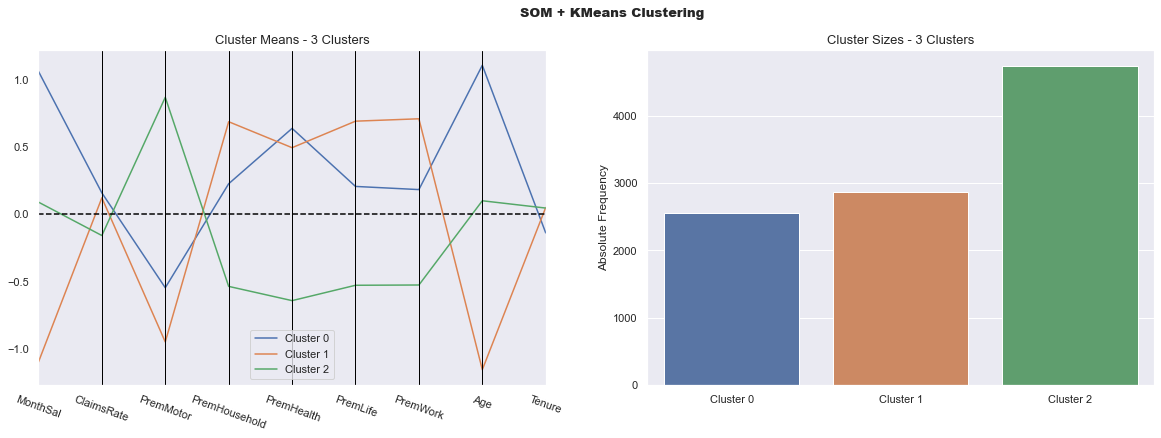

In [129]:
cluster_profiles(
    df = df_som[df_som_kmeans_r2], 
    label_columns = ['labelKmeans'], 
    figsize = (20, 6), 
    compar_titles = ["SOM + KMeans Clustering"]
)

<hr>
<a class="anchor" id="merge">
    
## 6.6 Merging Perspectives
    
</a>

In [130]:
df_to_merge = df_final.copy()

In [131]:
df_to_merge.head()

,CustID,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Age,...,x0_3.0,x0_4.0,x1_1.0,x2_2 - High School,x2_3 - BSc/MSc,x2_4 - PhD,PC0,PC1,PC2,PC3
0,1.0,-0.332547,0.641664,-0.907073,0.560462,-0.546326,-0.298094,0.141350,-0.517825,-0.807859,...,0.0,0.0,1.0,1.0,0.0,0.0,0.328393,-1.647886,-0.351046,-0.167294
1,2.0,-1.861894,-1.373317,1.381258,-1.615793,0.920581,-0.698539,3.414266,1.491846,-1.558211,...,0.0,1.0,1.0,1.0,0.0,0.0,4.383625,0.686248,2.000001,0.831394
2,3.0,-0.230590,1.128391,-1.251890,-0.677215,0.085522,-0.592051,1.014453,1.331730,-0.115226,...,1.0,0.0,0.0,0.0,0.0,0.0,1.232174,0.119007,-1.838391,-0.902434
3,4.0,-1.431638,-0.924206,0.973747,-0.849848,-0.703580,1.926286,-0.117651,-0.259973,-0.750139,...,0.0,1.0,1.0,0.0,1.0,0.0,1.348300,0.684905,0.377470,1.947172
4,5.0,-0.754647,-0.718733,0.691624,0.288932,-0.684195,0.190889,-0.485180,0.035262,-0.288384,...,0.0,1.0,1.0,0.0,1.0,0.0,0.053737,-0.330880,0.664724,1.236696


In [132]:
df_to_merge['som_labels'] = df_som['labelKmeans']
df_to_merge['kmean_labels'] = km_labels
df_to_merge.head()

,CustID,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Age,...,x1_1.0,x2_2 - High School,x2_3 - BSc/MSc,x2_4 - PhD,PC0,PC1,PC2,PC3,som_labels,kmean_labels
0,1.0,-0.332547,0.641664,-0.907073,0.560462,-0.546326,-0.298094,0.141350,-0.517825,-0.807859,...,1.0,1.0,0.0,0.0,0.328393,-1.647886,-0.351046,-0.167294,2,2
1,2.0,-1.861894,-1.373317,1.381258,-1.615793,0.920581,-0.698539,3.414266,1.491846,-1.558211,...,1.0,1.0,0.0,0.0,4.383625,0.686248,2.000001,0.831394,1,0
2,3.0,-0.230590,1.128391,-1.251890,-0.677215,0.085522,-0.592051,1.014453,1.331730,-0.115226,...,0.0,0.0,0.0,0.0,1.232174,0.119007,-1.838391,-0.902434,1,0
3,4.0,-1.431638,-0.924206,0.973747,-0.849848,-0.703580,1.926286,-0.117651,-0.259973,-0.750139,...,1.0,0.0,1.0,0.0,1.348300,0.684905,0.377470,1.947172,1,0
4,5.0,-0.754647,-0.718733,0.691624,0.288932,-0.684195,0.190889,-0.485180,0.035262,-0.288384,...,1.0,0.0,1.0,0.0,0.053737,-0.330880,0.664724,1.236696,2,2


In [133]:
# Centroids of the concatenated cluster labels
df_centroids = df_to_merge.groupby(['som_labels', 'kmean_labels'])\
    [metric_features].mean()
df_centroids

MonthSal  CustMonVal  ClaimsRate  PremMotor  \
som_labels kmean_labels                                                
0          0             0.140149    1.060681   -0.552950  -0.875615   
           1             1.091363   -0.110717    0.183978  -0.543275   
           2             0.175019    0.891366   -0.675378   0.133026   
1          0            -1.156879    0.128120    0.096688  -1.087714   
           1            -0.136400   -0.367435    0.356949  -0.473642   
           2            -0.823152   -0.331194    0.265650   0.075306   
2          0            -0.877530    0.521817   -0.465027  -0.136198   
           1             0.922568   -0.024480   -0.064732   0.273872   
           2            -0.020892   -0.005204   -0.167921   0.969450   

                         PremHousehold  PremHealth  PremLife  PremWork  \
som_labels kmean_labels                                                  
0          0                  1.453880   -0.345442  0.838313  0.937711   
           1                  0.190731    0.673471  0.190902  0.162872   
           2                  0.556612   -0.653102  0.038806  0.155978   
1          0                  0.847814    0.464866  0.846626  0.865213   
           1                 -0.294484    1.272381 -0.130491 -0.178958   
           2                 -0.403161    0.547261 -0.391802 -0.366598   
2          0                  0.221461    0.050737  0.123924  0.048341   
           1                 -0.281393   -0.035577 -0.249457 -0.231888   
           2                 -0.584459   -0.741548 -0.578188 -0.577343   

                              Age    Tenure  
som_labels kmean_labels                      
0          0             0.281594 -0.065916  
           1             1.133631 -0.137994  
           2             0.195956 -0.412558  
1          0            -1.214247  0.006544  
           1            -0.331674  0.221329  
           2            -0.843350  0.354649  
2          0            -0.900797  0.015644  
           1             0.930683  0.371568  
           2            -0.010013 -0.003006

In [134]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

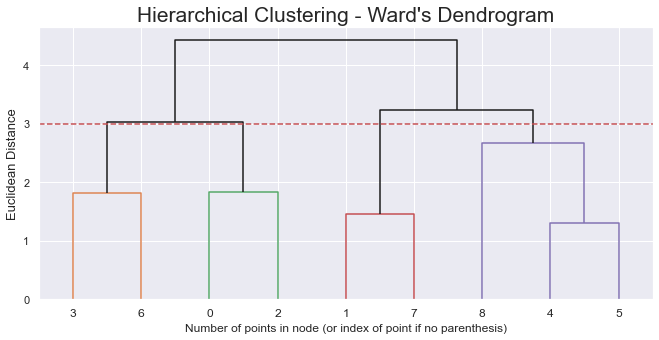

In [135]:
# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 3
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

In [136]:
hclust = AgglomerativeClustering(n_clusters=3)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

In [137]:
cluster_mapper = df_centroids['hclust_labels'].to_dict()

# Mapping the hierarchical clusters on the centroids to the observations
df_to_merge['merged_labels'] = df_to_merge.apply(lambda row: cluster_mapper[
    (row['som_labels'], row['kmean_labels'])
], axis=1)

# Merged cluster centroids
df_to_merge.groupby('merged_labels').mean()[metric_features]

,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Age,Tenure
merged_labels,,,,,,,,,,
0,-1.107383,0.166335,0.061512,-1.050517,0.845964,0.426065,0.823137,0.842441,-1.158461,0.001317
1,-0.078365,-0.033376,-0.129794,0.885310,-0.567439,-0.621280,-0.558404,-0.556622,-0.072794,0.025257
2,1.058108,-0.093727,0.134978,-0.382286,0.097716,0.533779,0.104145,0.085099,1.093647,-0.037603


In [138]:
# #Merge cluster contigency table
# # Getting size of each final cluster
# df_counts = df_to_merge.groupby('merged_labels')\
#     .size()\
#     .to_frame()

# # Getting the value and pca labels
# df_counts = df_counts\
#     .rename({v:k for k, v in cluster_mapper.items()})\
#     .reset_index()

# df_counts['som_labels'] = df_counts['merged_labels'].apply(lambda x: x[0])
# df_counts['kmean_labels'] = df_counts['merged_labels'].apply(lambda x: x[1])
# df_counts.pivot('som_labels', 'kmean_labels', 0)

In [139]:
df_to_merge_columns = ['MonthSal','ClaimsRate', 'CustMonVal','PremMotor','PremHousehold','PremHealth','PremLife','PremWork','Age','Tenure','merged_labels']
df_to_merge_columns

['MonthSal',
 'ClaimsRate',
 'CustMonVal',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork',
 'Age',
 'Tenure',
 'merged_labels']

In [140]:
# Computing the R^2 of the cluster solution

# get total sum of squares
sst = get_ss(df_final[metric_features])  

# compute ssw for each cluster labels
ssw_labels = df_to_merge[df_to_merge_columns].groupby(by='merged_labels').apply(get_ss) 

ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB

r2 = ssb / sst

print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.3338


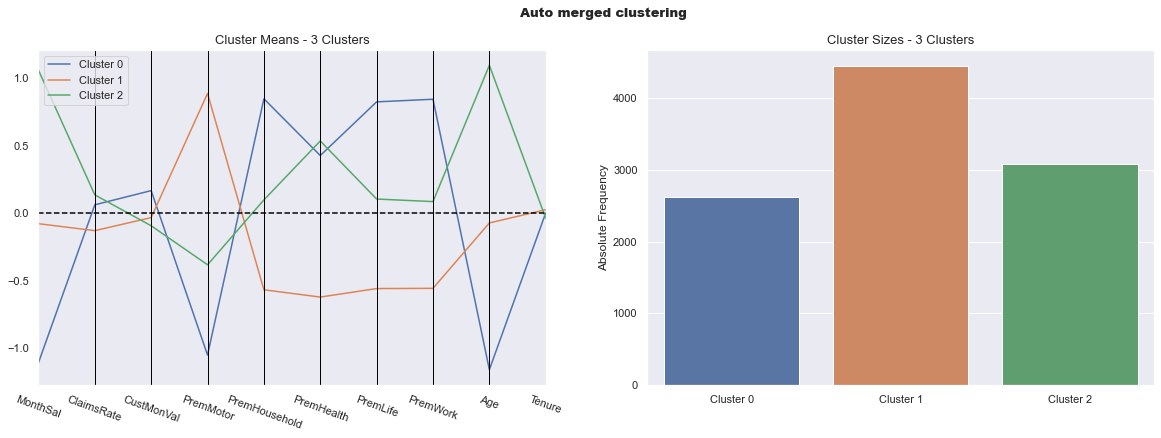

In [141]:
cluster_profiles(
    df = df_to_merge[df_to_merge_columns], 
    label_columns = ['merged_labels'], 
    figsize = (20, 6), 
    compar_titles = ["Auto merged clustering"]
)

<hr>
<a class="anchor" id="tsne">
    
## 6.7 Dimensionality Visualization
    
</a>

### Radar Plot

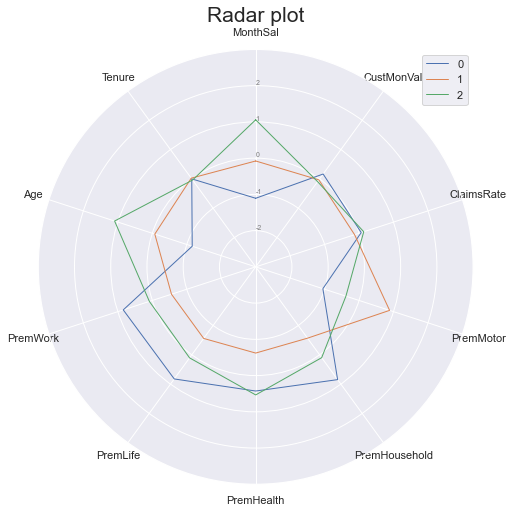

In [142]:
df_merge_centroids = df_to_merge.groupby('merged_labels').mean()[metric_features]

plt.figure(figsize=(12,8))
N = len(metric_features)
 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], metric_features)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([-2,-1,0,1,2], ["-2","-1","0","1","2"], color="grey", size=7)
plt.ylim(-3,3)
 
# Plot each individual 
for i in range(len(df_merge_centroids)):
    values=df_merge_centroids.loc[i].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=i)

plt.title('Radar plot', fontsize=21)
plt.legend(loc='upper right')
plt.show()

### T-SNE

In [143]:
df_merge_centroids

,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Age,Tenure
merged_labels,,,,,,,,,,
0,-1.107383,0.166335,0.061512,-1.050517,0.845964,0.426065,0.823137,0.842441,-1.158461,0.001317
1,-0.078365,-0.033376,-0.129794,0.885310,-0.567439,-0.621280,-0.558404,-0.556622,-0.072794,0.025257
2,1.058108,-0.093727,0.134978,-0.382286,0.097716,0.533779,0.104145,0.085099,1.093647,-0.037603


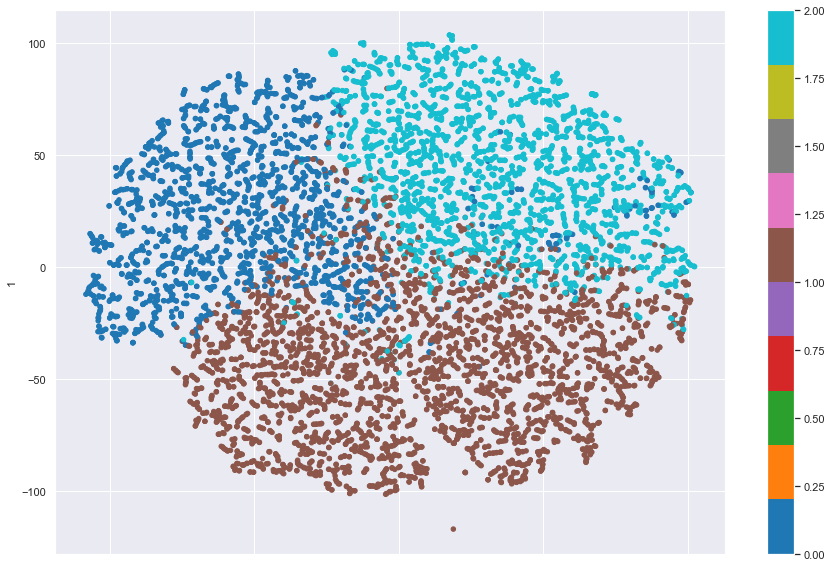

In [144]:
two_dim = TSNE(n_components=2,perplexity=5, n_jobs=-1).fit_transform(df_to_merge[metric_features])

# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df_to_merge['merged_labels'], colormap='tab10', figsize=(15,10))
plt.show()


<hr>
<a class="anchor" id="outliers_classification">
    
## 6.8 Outliers Classification
    
</a>

In [145]:
#creating the variable Age from the Birthday Year variable (Year of the dataset is 2016)
df_outliers['Age'] = 2016 - df_outliers['BirthYear']

#Creating the variable Tenure which means the amount of years the customer is a client
df_outliers['Tenure'] = 2016 - df_outliers['FirstPolYear']

#casting the variables to the right data type
df_outliers.astype({
            'Age': 'int64',
            'Tenure': 'int64'
          }).dtypes

#show df_outliers
df_outliers.head(2)

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,LabelEducDeg,Age,Tenure
51,52.0,1982.0,1966.0,3 - BSc/MSc,3234.0,4.0,1.0,-14714.08,25.36,557.44,20.00,29.56,5.00,-9.00,3.0,50.0,34.0
112,113.0,1997.0,1979.0,4 - PhD,2354.0,1.0,1.0,-8719.04,15.65,518.32,4.45,55.90,3.89,10.89,4.0,37.0,19.0


In [146]:
#creating a copy of the outlier dataframe
df_outliers_copy = df_outliers[metric_features].copy()

#fits the Scaler in the metric_features into the outlier observations
outliers_scaled = scaler.fit_transform(df_outliers_copy)

#creating a dataframe from the scaled data
df_outliers_scaled = pd.DataFrame(outliers_scaled, columns=df_outliers_copy.columns, index = df_outliers_copy.index)

#drop categorical variables columns
# df_outliers_scaled.drop(['FirstPolYear','BirthYear','EducDeg','CustID'], axis = 1, inplace = True)

#show the dataframe scaled
df_outliers_scaled.head()

,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Age,Tenure
51,0.088678,-0.720795,0.802467,0.094184,-0.263297,-0.152919,-0.980484,-0.694000,0.027506,0.086952
112,-0.074032,-0.357781,0.410525,0.066319,-0.270052,-0.142303,-0.990376,-0.598576,-0.128362,0.083562
135,-0.106944,-0.447391,0.376215,-0.090891,-0.201263,-0.107055,0.191196,-0.665215,-0.236270,0.083562
145,-0.037052,0.164357,-0.175976,-0.200050,-0.276807,-0.010937,-0.604124,-0.589509,-0.212291,0.086726
149,-0.327342,0.185660,-0.195755,-0.256649,-0.186297,-0.152919,-0.859635,1.515430,-0.308209,0.085370


In [147]:
# Creating the dependent and independent variables to dt classification
X = df_to_merge[metric_features]
y = df_to_merge.loc[:, 'merged_labels']

# Split dataset into training set and test set // # 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

print(dtc.score(X_test, y_test))

0.9517716535433071


In [148]:
df_outliers_scaled['merged_labels'] = dtc.predict(df_outliers_scaled[metric_features])
df_outliers_scaled['merged_labels'].value_counts()

0    56
1    43
2    37
Name: merged_labels, dtype: int64

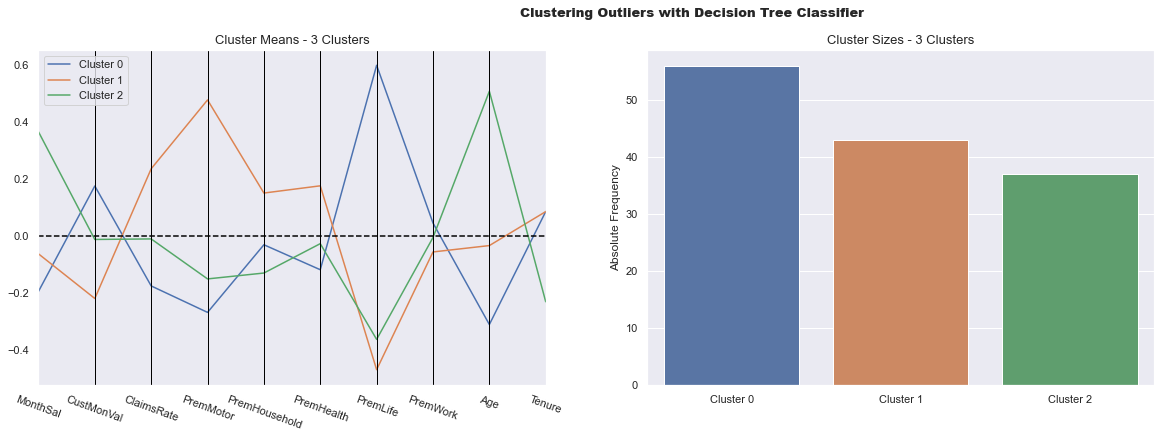

In [149]:
cluster_profiles(
    df = df_outliers_scaled, 
    label_columns = ['merged_labels'], 
    figsize = (20, 6), 
    compar_titles = ["Clustering Outliers with Decision Tree Classifier"]
)

<hr>
<a class="anchor" id="conclusion">
    
## 7.0 Conclusion
    
</a>

In [150]:
# Consolidating the clusters into the original dataset (after missing values and outliers treatment)
df_original = pd.concat((df_to_merge['merged_labels'], df_merge ), axis=1)

#creating the variable Age from the Birthday Year variable (Year of the dataset is 2016)
df_original['Age'] = 2016 - df_original['BirthYear']

#Creating the variable Tenure which means the amount of years the customer is a client
df_original['Tenure'] = 2016 - df_original['FirstPolYear']

#drops redundant variables
df_original.drop(['FirstPolYear','BirthYear','LabelEducDeg'], axis = 1, inplace = True)


#casting the variables to the right data type
df_original.astype({
            'Age': 'int64',
            'Tenure': 'int64'
          }).dtypes
  

merged_labels      int64
CustID           float64
EducDeg           object
MonthSal         float64
GeoLivArea       float64
Children         float64
CustMonVal       float64
ClaimsRate       float64
PremMotor        float64
PremHousehold    float64
PremHealth       float64
PremLife         float64
PremWork         float64
Age                int64
Tenure             int64
dtype: object

In [151]:
df_original.groupby('merged_labels').mean()

,CustID,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Age,Tenure
merged_labels,,,,,,,,,,,,,
0,5240.455687,1417.032408,2.705591,0.829213,260.166851,0.698988,154.965932,399.070540,200.014833,77.729741,77.292994,27.925751,29.990262
1,5103.774157,2426.304539,2.687640,0.900000,209.411169,0.637960,420.390534,74.603236,122.414282,15.480670,15.167230,46.735146,30.148135
2,5151.960402,3540.969166,2.748783,0.328140,194.073145,0.722425,246.588242,227.299270,207.995571,45.333621,43.663009,66.943979,29.733593


#### Analyzing the mean values of each cluster we noticed that there was a noise in the Tenure observations, and didn't make sense when some customers had a first purchase (tenure) before their birthday. Finally, we decided on removing the Tenure variable for the sake of the coherenceness.

In [152]:
delta_tenure = df_original['Tenure'] - df_original['Age']
delta_tenure.describe()

count    10160.000000
mean       -18.014744
std         18.637668
min        -62.000000
25%        -33.000000
50%        -18.000000
75%         -3.000000
max         27.000000
dtype: float64

#### Analyzing the Categorical features of the clusters

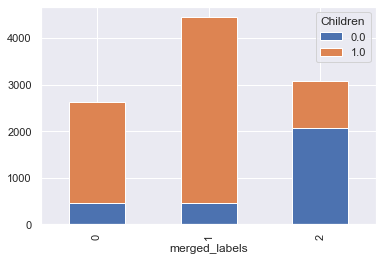

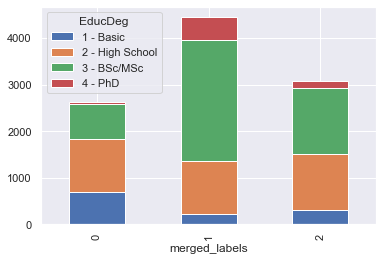

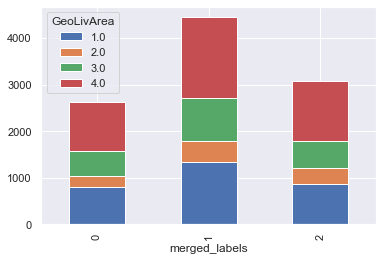

In [153]:
# Comparing Education Level and the presence of children
sns.set()
df_counts = df_original\
    .groupby(['merged_labels', 'Children'])\
    .size()\
    .unstack()\
    .plot.bar(stacked=True)

# Comparing Education Level and the presence of children
sns.set()
df_counts = df_original\
    .groupby(['merged_labels', 'EducDeg'])\
    .size()\
    .unstack()\
    .plot.bar(stacked=True)

# Comparing Education Level and the presence of children
sns.set()
df_counts = df_original\
    .groupby(['merged_labels', 'GeoLivArea'])\
    .size()\
    .unstack()\
    .plot.bar(stacked=True)

#### Analyzing the Metric features of the clusters

<AxesSubplot:xlabel='merged_labels', ylabel='Age'>

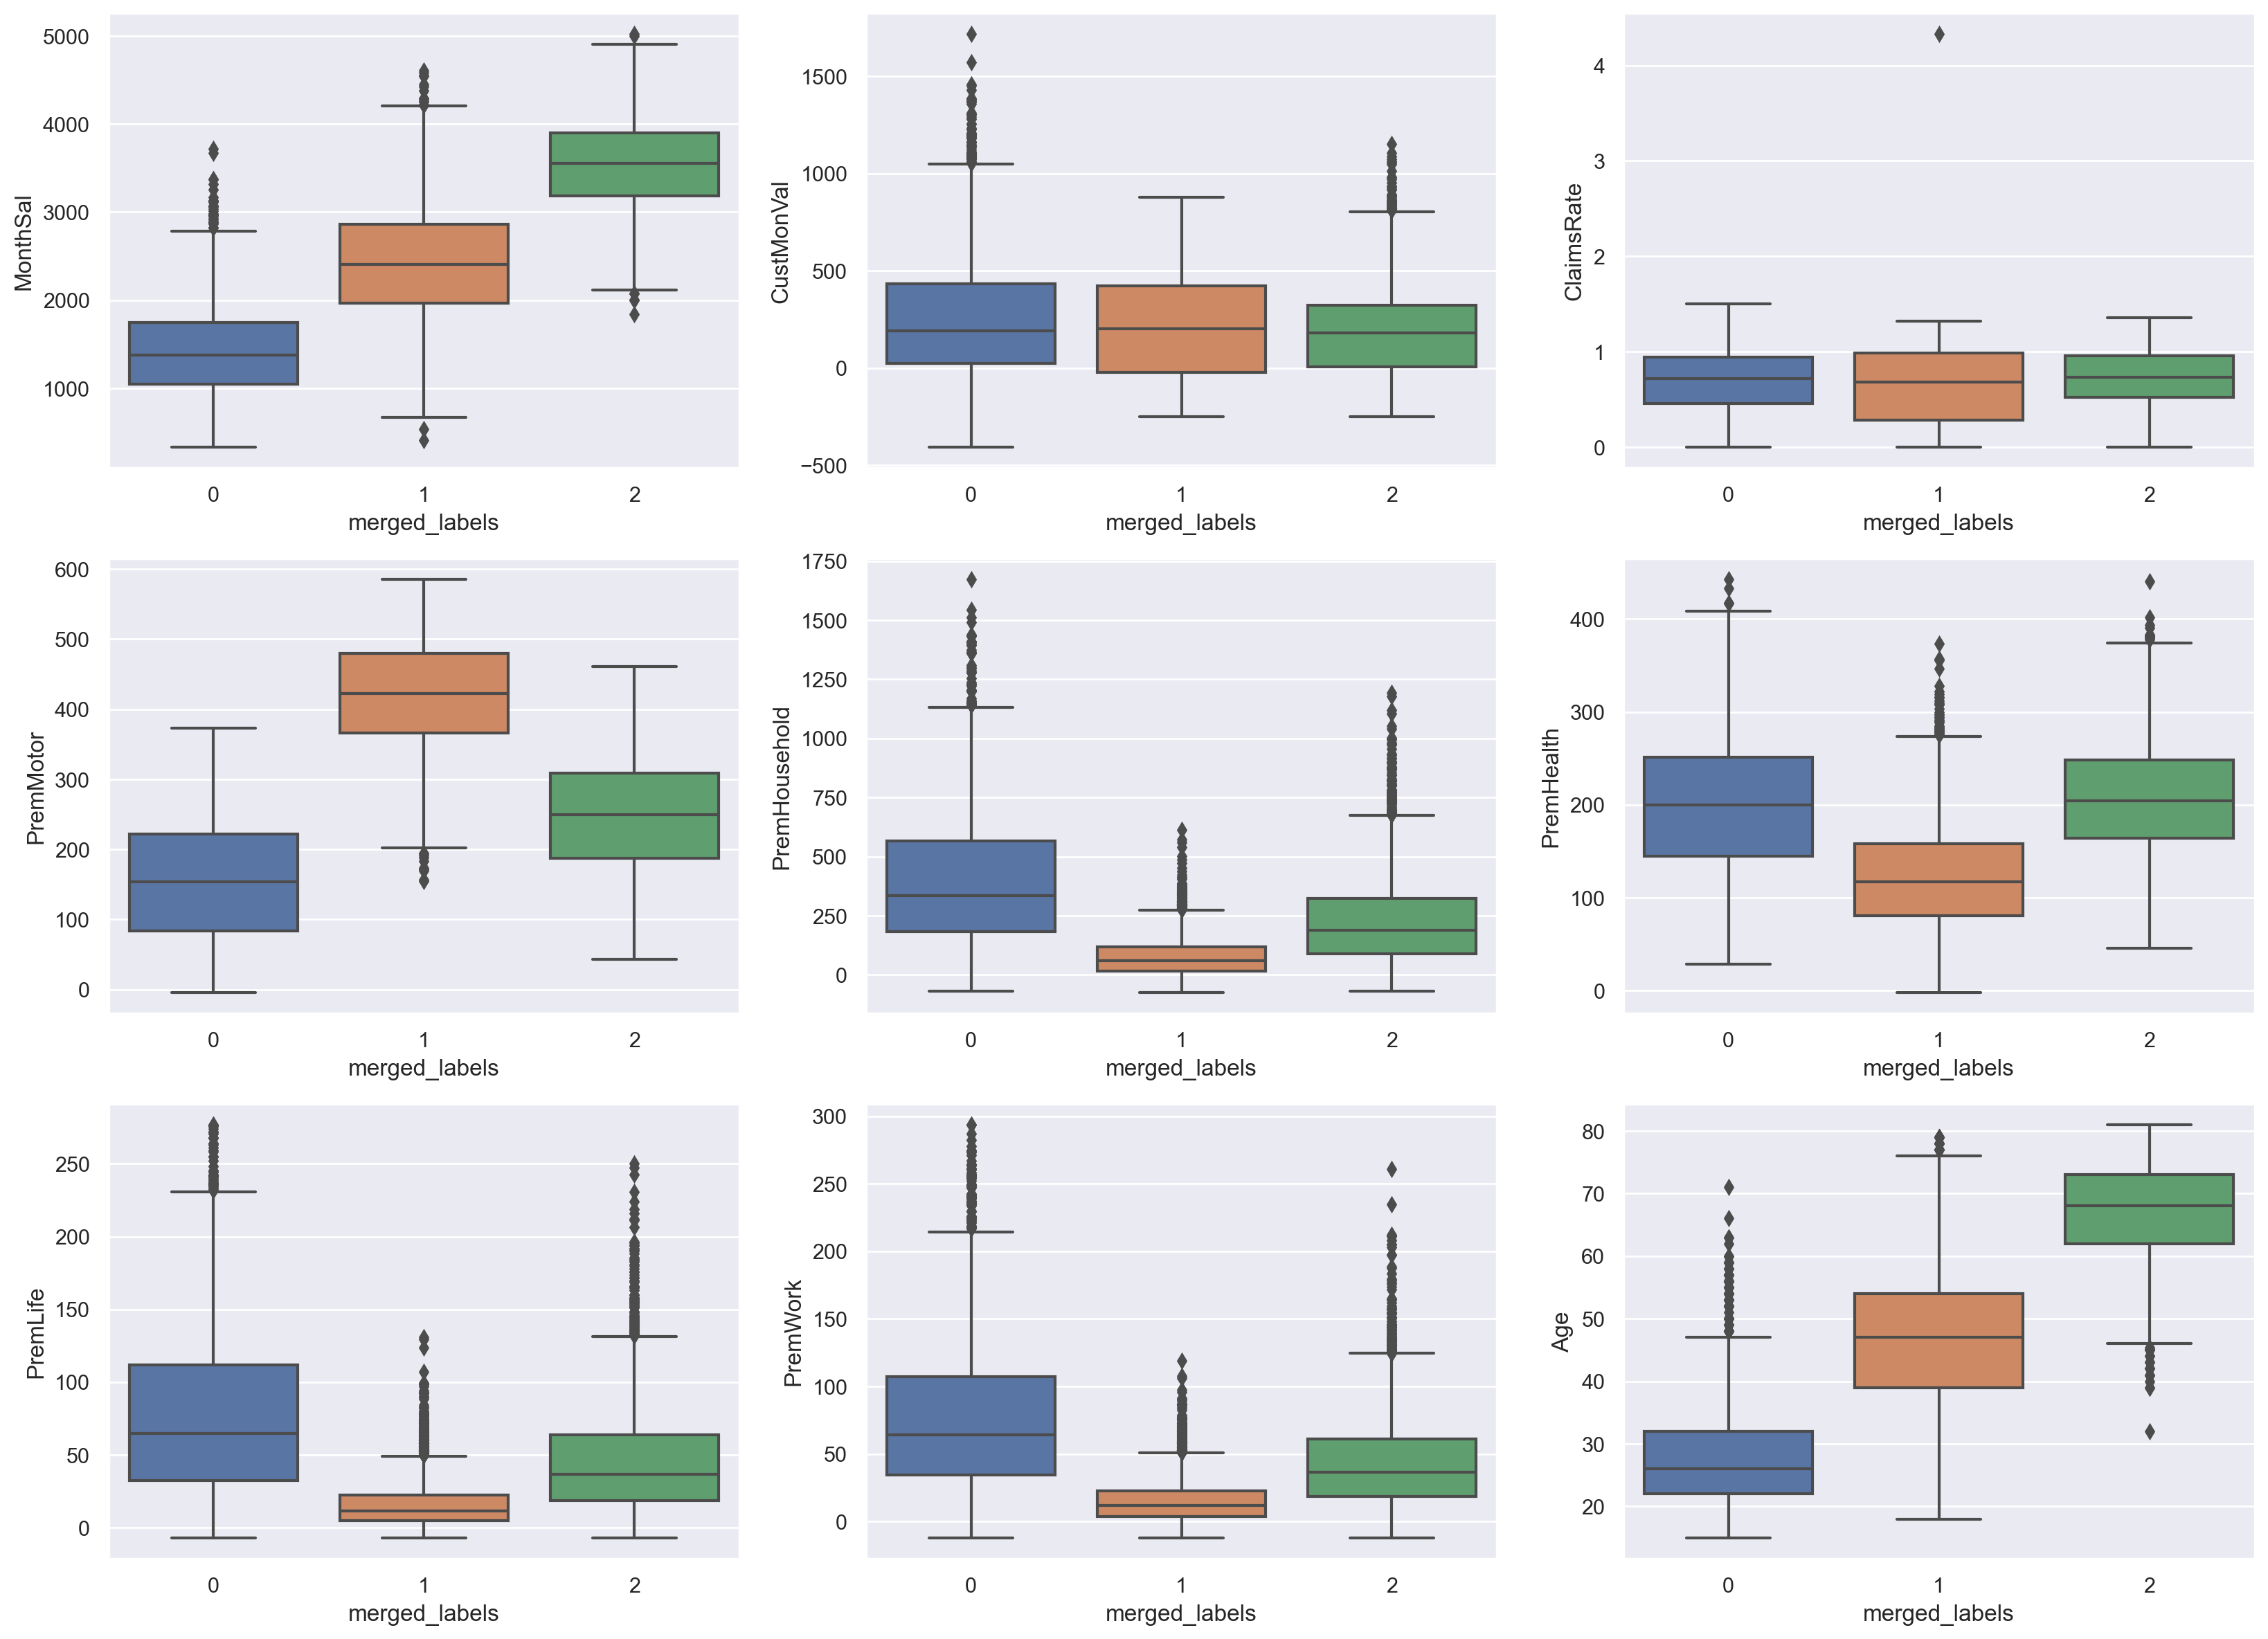

In [154]:
# plotting sub-plots to analyse the results

plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x='merged_labels', y='MonthSal', data=df_original)

plt.subplot(4,3,2)
sns.boxplot(x='merged_labels', y='CustMonVal', data=df_original)

plt.subplot(4,3,3)
sns.boxplot(x='merged_labels', y='ClaimsRate', data=df_original)

plt.subplot(4,3,4)
sns.boxplot(x='merged_labels', y='PremMotor', data=df_original)

plt.subplot(4,3,5)
sns.boxplot(x='merged_labels', y='PremHousehold', data=df_original)

plt.subplot(4,3,6)
sns.boxplot(x='merged_labels', y='PremHealth', data=df_original)

plt.subplot(4,3,7)
sns.boxplot(x='merged_labels', y='PremLife', data=df_original)

plt.subplot(4,3,8)
sns.boxplot(x='merged_labels', y='PremWork', data=df_original)

plt.subplot(4,3,9)
sns.boxplot(x='merged_labels', y='Age', data=df_original)




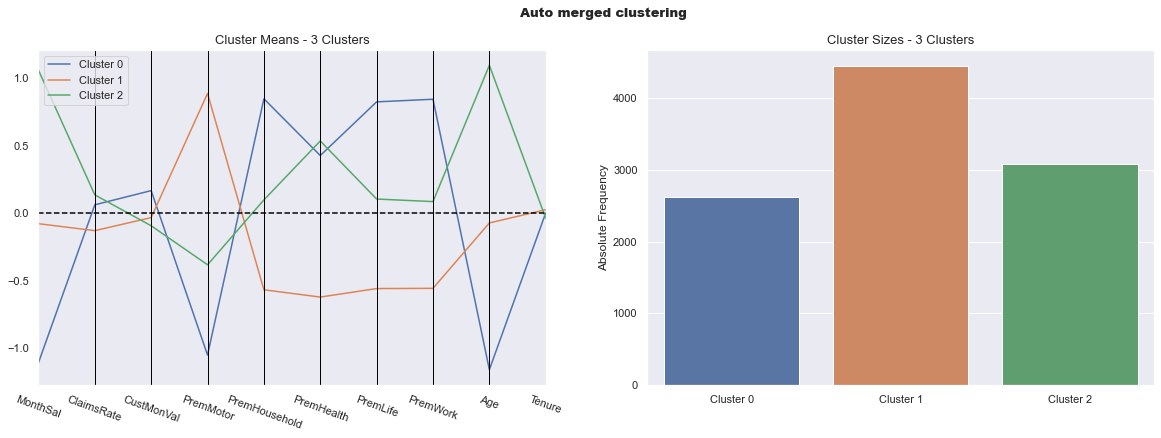

In [155]:
#cluster profile
cluster_profiles(
    df = df_to_merge[df_to_merge_columns], 
    label_columns = ['merged_labels'], 
    figsize = (20, 6), 
    compar_titles = ["Auto merged clustering"]
)

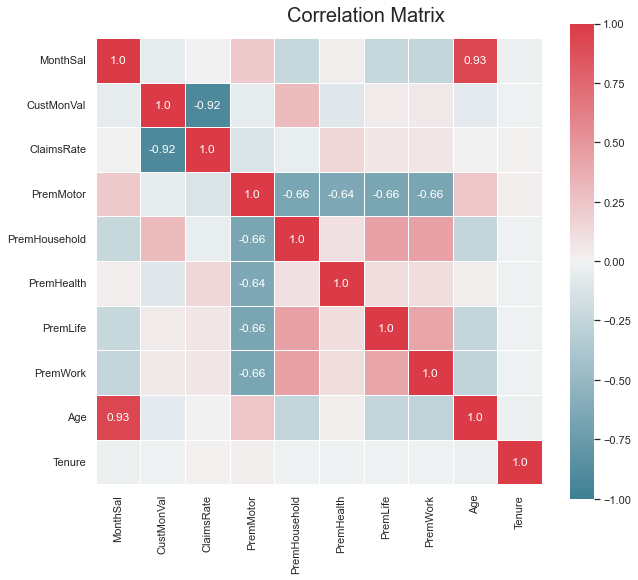

In [156]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df_original[metric_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

	Cluster 0 - has the highest Premiums, excepting the Motor one (which is the lowest of them all). We can highlight the “PremHousehold” that corresponds to 30% of the Premiums values and has the biggest positive correlation with “CustMonVal” (CMV). This explains why it holds 39% of this valuable indicator (even when “ClaimsRate” is the second among the clusters). Calls our attention, that this cluster has the youngest individuals (mean age of 28 years).


	Cluster 1 – this group characterizes for a high spend on Motor LOB and the existence of children. It is the grouping with the most of individuals and mean age of 47 years.

	Cluster 2 – the age here is a key factor as the average is 67 years. Consequently, as expected, it has the highest “MontSal” (48% of the total salaries, in average). In the other hand they don’t have children or dependents in a large number (it’s the cluster with less children/dependents) and, probably is because their children don’t live or depend on them anymore. Their spent is more in Health what is expected as well.



## Thanks!